# Executive Summary #

The objective of this project was to predict trends within the data job market related to salary and job categorisation. Data was scraped by the use of Scrapy from a job aggregator 'seek.com.au' for all jobs related to Data and within Australia. 
Plenty of data cleaning was required in this instance whereby data begun around the 13,000 entries mark then later dropped down to just under 3,000 data related jobs that could be worked on. Jobs were broken into bands for e.g. $0 - $70,000, $80,000 - $100,000 and so on. With regard to certain jobs that did not include a salary, a mean salary figure was imputed to those jobs. Furthermore, calculation was conducted to approximate an annual salary figure for other jobs that were advertised as hourly, fortnightly etc. 

Natural Language Processing techniques were employed to give numerical values to words particular in the job description, location and title fields. Regression and Classification algorithms were also employed in this project to see which had the better score or at least explained the most variance of the salary data. 

Due to circumstances which hindered adequate data cleaning and further NLP techniques applied, the data that was fed into the models was not of the highest quality thus resulting in a poor output. 

A number of classification models were used ranging from Random Forest Regressors to Extra Trees Regressors. The Random Forest Regressor was explaining 0.72 of the salary data whereas the Extra Trees Regressors was explaining 0.86. Once salaries were converted to a discrete variable and were in buckets I did apply a Logistic Regression which provided a score of 0.59. With regard to these figures, depending on Subject Matter Experts and their domain knowledge, these figures could provide to be sufficient. 

Key takeaway points that resulted from this project:
- Never underestimate the difficulty of the project, sometimes it may seem relatively straight forward or easy when in actual fact it is anything but. 
- Data Science is 80% cleaning and 20% algorithm's / modelling. So clean the data thoroughly. 
- Coding may seem difficult now and will probably be for sometime for a beginner, but with persistance that skill will improve. 



In [209]:
import requests
from scrapy.selector import Selector
import pandas as pd, numpy as np
from bs4 import BeautifulSoup
import re
import time 
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob

from selenium import webdriver

import scrapy

from scrapy.exporters import CsvItemExporter


from nltk.stem.snowball import SnowballStemmer

from textblob import TextBlob, Word

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer



In [4]:
# Would be worthwhile to find out how many jobs there are and also how many pages are there 

jobs_per_page_seek = 22 #from observations

# number of jobs scraped changes almost daily 
jobs_total_seek = 14997 #this is for data analyst only 

num_of_pages_seek = round(jobs_total_seek / jobs_per_page_seek)
num_of_pages_seek

682

In [ ]:
# Used this code multiple times to pull data jobs from seek only difference in URL is the salary ranges:
# https://www.seek.com.au/data-jobs/in-All-Australia?salaryrange=0-70000&salarytype=annual
# https://www.seek.com.au/data-jobs/in-All-Australia?salaryrange=80000-100000&salarytype=annual
# https://www.seek.com.au/data-jobs/in-All-Australia?salaryrange=100000-150000&salarytype=annual
# https://www.seek.com.au/data-jobs/in-All-Australia?salaryrange=120000-200000&salarytype=annual
# https://www.seek.com.au/data-jobs/in-All-Australia?salaryrange=200000-999999&salarytype=annual
    


In [8]:
import scrapy

from scrapy.crawler import CrawlerProcess

class SeekSpider(scrapy.Spider):

    
    name = "job_search"
    allowed_domains = ["seek.com.au"]
    start_urls = ['https://www.seek.com.au/data-jobs/in-All-Australia?salaryrange=0-70000&salarytype=annual']
    
    custom_settings = {
        'FEED_FORMAT' : 'csv',
        'FEED_URI' : 'seek_test.csv'
        }
    
    def parse(self, response):
        print("-----------------")
        print("I just visited :" + response.url)
        print("-----------------")
        urls = response.css('h1 > a::attr(href)').extract()
        for url in urls:
            url = response.urljoin(url)
            yield scrapy.Request(url = url, callback =self.parse_details)
            
        next_page = response.css('a[data-automation="page-next"]::attr(href)').extract_first()
        if next_page is not None:
            next_page = response.urljoin(next_page)
            yield scrapy.Request(next_page, callback = self.parse)
    
    def parse_details(self, response):
        yield {
            'title': response.css('span[data-automation="job-detail-title"] h1::text')[0].extract(),
            'date': response.css('dd[data-automation="job-detail-date"] span::text')[1].extract(),
            'company': response.css('span[data-automation="advertiser-name"] span::text')[0].extract(),
            'location': response.css('strong._7ZnNccT::text')[1].extract(),
            'area': response.css('span._2TSaU36::text')[0].extract(),
            'salary': response.css('span._7ZnNccT::text')[1].extract(),
                if 'salary' 
                else
        
            'description': response.css('div[data-automation="mobileTemplate"] p::text').extract()
        }
        
process = CrawlerProcess()
process.crawl(SeekSpider)
process.start()

SyntaxError: invalid syntax (<ipython-input-8-d153ea04cc09>, line 39)

As a result of Scrapy running it's code it has also managed to create csv files for each salary band and I have then
aggregated them together at a later stage. 

In [ ]:
# Have acquired multiple csv files from seek where I have changed the scraping URl to filter out salary in buckets


In [ ]:
# Game plan is to work on each individual csv file that has been extracted from seek and impute the mean into the salary
# column and then we will concat all of them once that's been done. 

In [ ]:
data_0_70000.csv

In [ ]:
data_80000_100000.csv

In [ ]:
data_120000_150000.csv

In [ ]:
data_150000_200000.csv

In [ ]:
data_200000+.csv

In [5]:
data80_100 = pd.read_csv('./Seek_data/data_80000_100000.csv')

In [6]:
data80_100.head(30)

,title,date,company,location,area,salary,description
0,Senior Data & Analytics Strategist,10 Feb 2021,The Lumery,Melbourne,CBD & Inner Suburbs,Full Time,This is a permanent role reporting to the Data...
1,Data Cleansing Analysts,15 Feb 2021,DFP Recruitment,Perth,"CBD, Inner & Western Suburbs",Contract/Temp,NaN
2,Data Entry Labourers,15 Feb 2021,Labour Solutions Australia,Sydney,"CBD, Inner West & Eastern Suburbs",Contract/Temp,Labour Solutions Australia has an immediate n...
3,Data Analyst - Reporting and Measurement,15 Feb 2021,Launch Recruitment Pty Ltd,Sydney,"CBD, Inner West & Eastern Suburbs",perm salary,NaN
4,Senior Data Analyst,15 Feb 2021,Western Health Alliance Limited,Blue Mountains & Central West,Business/Systems Analysts,Full Time,", ,The WNSW PHN is one of 31 Primary Health N..."
5,Senior Data Analyst,15 Feb 2021,Western Health Alliance Limited,Blue Mountains & Central West,Business/Systems Analysts,Full Time,", ,The WNSW PHN is one of 31 Primary Health N..."
6,Senior Data Analyst,15 Feb 2021,Western Health Alliance Limited,Far West & North Central NSW,Business/Systems Analysts,Full Time,", ,The WNSW PHN is one of 31 Primary Health N..."
7,DATA MODELER,21 Jan 2021,Ajeka,Brisbane,CBD & Inner Suburbs,Full Time,"OPPORTUNITY,You will be engaged with a range o..."
8,Senior Data Analyst,15 Feb 2021,Western Health Alliance Limited,Dubbo & Central NSW,Business/Systems Analysts,Full Time,", ,The WNSW PHN is one of 31 Primary Health N..."
9,Data Analyst,10 Feb 2021,IPA Townsville,Northern QLD,"Environmental, Earth & Geosciences",Contract/Temp,NaN


In [ ]:
# testing 
for i in range(30):
    print(i)
    
    if len((re.findall(r'[0-9,]+',data80_100.salary[i]))) == 0:
        print('impute value')
    else:
        print(re.findall(r'[0-9,]+',data80_100.salary[i])) 

#     impute mean in the "impute values"
    

In [7]:
data80_100.salary.unique()

array(['Full Time', 'Contract/Temp', 'perm salary',
       '$64/hour + Superannuation (9.5%)', '$130k +',
       'ASAP START -   Competitive Rates', '$100k - $120k p.a.',
       '$50 - $51 p.h.', '$50 per hour plus super', '$90,000 - $109,999',
       '$80,000 - $110,000', '$460/day', 'APS5 Hourly Rate Equivalent',
       'Excellent Remuneration Package', '$35 - $44.99 per hour',
       '$50.00 - $60.00', '$40 - $45 p.h. + superannuation',
       '$90k - $110k p.a.',
       'Negotiable rates\r\n$40 - $60 per hr (inc. super)',
       '$98k to $142k package + bonuses', '$80,000 - $90,000',
       'Salary Packaging', '$50 - $74.99 per hour',
       '$97,455 (Inc Super) (Pro-rata)',
       '$300 - $500 p.d. + Negotiable pending on experienc',
       '$90k - $110000.00 p.a. + Bonus ', '$400 - $500 p.d. + + Super',
       'Part Time', 'Circa $100k', '$120,000 - $200,000',
       '$80,000 package', '$100,000 package', '$70k - $85k plus super',
       'Up to $95000.00 p.a.',
       '$100000 - 

In [8]:
def average_value(string_salary):
    
    if len(re.findall(r'[0-9,.]+',string_salary)) == 1:
        return float(re.findall(r'[0-9,]+',string_salary)[0].replace(',',''))
    
    if len(re.findall(r'[0-9,.]+',string_salary)) == 2:
        values = []
        
        for string in re.findall(r'[0-9,.]+',string_salary):
            values.append(string.replace(',',''))
            
        return ((float(values[0])+float(values[1]))/2)
    
    else:
        
        return (float(90000))

In [9]:
def salary_converter(salary):
    try:
        
        if type(salary) == str:

            if len(re.findall(r'[0-9]+',salary)) >= 1:
                if 'year' in salary:
                    job_salary = average_value(salary)
                elif 'month' in salary:
                    job_salary = average_value(salary)*12
                elif 'week' in salary:
                    job_salary = average_value(salary)*48
                elif 'day' in salary:
                    job_salary = average_value(salary)*48*5
                elif 'hour' in salary:
                    job_salary = average_value(salary)*48*40
                else:
                    job_salary = average_value(salary)
            else:
                job_salary = float('90000')

        else:
            job_salary = float(salary)
        
        if job_salary < 300:
            job_salary = job_salary * 1000
        
        if job_salary < 10000:
            job_salary = 90000
            

        return job_salary
    
    except: 
        return float(90000)

In [10]:
re.findall(r'[0-9,.]+',data80_100.salary[169])

[',', ',']

In [11]:
count = 0

for i in data80_100.salary[:2000]:
    count += 1
    print(count,i,salary_converter(i))
    

1 Full Time 90000.0
2 Contract/Temp 90000.0
3 Contract/Temp 90000.0
4 perm salary 90000.0
5 Full Time 90000.0
6 Full Time 90000.0
7 Full Time 90000.0
8 Full Time 90000.0
9 Full Time 90000.0
10 Contract/Temp 90000.0
11 $64/hour + Superannuation (9.5%) 70560.0
12 Contract/Temp 90000.0
13 Contract/Temp 90000.0
14 Full Time 90000.0
15 $130k + 130000.0
16 ASAP START -   Competitive Rates 90000.0
17 $100k - $120k p.a. 90000.0
18 $50 - $51 p.h. 90000.0
19 Contract/Temp 90000.0
20 $50 per hour plus super 96000.0
21 Full Time 90000.0
22 $90,000 - $109,999 99999.5
23 Full Time 90000.0
24 $80,000 - $110,000 95000.0
25 Full Time 90000.0
26 $460/day 110400.0
27 Full Time 90000.0
28 Full Time 90000.0
29 Contract/Temp 90000.0
30 Contract/Temp 90000.0
31 Full Time 90000.0
32 APS5 Hourly Rate Equivalent 90000
33 Excellent Remuneration Package 90000.0
34 Full Time 90000.0
35 $35 - $44.99 per hour 76790.40000000001
36 $50.00 - $60.00 55000.0
37 Contract/Temp 90000.0
38 Full Time 90000.0
39 $40 - $45 p.h.

783 Casual/Vacation 90000.0
784 Full Time 90000.0
785 $50-60 per hour plus super, 12-month assignment 1080000.0
786 Contract/Temp 90000.0
787 Full Time 90000.0
788 Full Time 90000.0
789 Salary Range ($110,745 - $122,038) per annum 116391.5
790 $44-$50/hour + Superannuation 90240.0
791 Full Time 90000.0
792 Salary Range ($110,745 - $122,038) per annum 116391.5
793 Contract/Temp 90000.0
794 Full Time 90000.0
795 Full Time 90000.0
796 Full Time 90000.0
797 Full Time 90000.0
798 Full Time 90000.0
799 Contract/Temp 90000.0
800 Full Time 90000.0
801 110000 110000.0
802 Contract/Temp 90000.0
803 $100,000 - $120,000 Salary package plus super 110000.0
804 Full Time 90000.0
805 $70,000 - $85,000 + Commission 77500.0
806 Full Time 90000.0
807 Full Time 90000.0
808 Full Time 90000.0
809 Full Time 90000.0
810 Contract/Temp 90000.0
811 $90k - $110000.00 p.a. + super + benefits dep on e 90000.0
812 $43.41 + super per hour 82560.0
813 flex on experience 90000.0
814 Full Time 90000.0
815 Full Time 9000

1431 Full Time 90000.0
1432 Full Time 90000.0
1433 Hourly rate contract | No agency admin fees 90000.0
1434 Full Time 90000.0
1435 Full Time 90000.0
1436 Contract/Temp 90000.0
1437 Full Time 90000.0
1438 Full Time 90000.0
1439 $45 - $50 / hr + super  47500.0
1440 Full Time 90000.0
1441 Up to $80k + Superannuation 80000.0
1442 $80,000 + superannuation 80000.0
1443 $85000.00 - $95000.00 p.a. 90000.0
1444 $80,000-$94,999; Plus Super, (Based on Experience) 90000.0
1445 Excellent Rate 90000.0
1446 Full Time 90000.0
1447 Full Time 90000.0
1448 Part Time 90000.0
1449 Loans/Leasing. 110k package. WFH. Permanent 90000.0
1450 Full Time 90000.0
1451 Contract/Temp 90000.0
1452 Full Time 90000.0
1453 Excellent Rate 90000.0
1454 Full Time 90000.0
1455 $80000 80000.0
1456 Contract/Temp 90000.0
1457 Full Time 90000.0
1458 Up to $41.31 p.h. 90000.0
1459 Contract/Temp 90000.0
1460 Up to $95K base + super +comms+allowances+phone 95000.0
1461 Full Time 90000.0
1462 Full Time 90000.0
1463 Full Time 90000.0

In [ ]:
data80_100.salary[215: 225]



In [13]:

test = data80_100.salary.map(salary_converter)
test

0       90000.0
1       90000.0
2       90000.0
3       90000.0
4       90000.0
         ...   
2187    90000.0
2188    90000.0
2189    90000.0
2190    90000.0
2191    90000.0
Name: salary, Length: 2192, dtype: float64

In [ ]:
test[97]

In [14]:
count = 0
position = 0

for i in test:
    position += 1
    if i < 10000:
        print(position, i)
        count +=1

print(count)

0


In [15]:
data80_100.salary

0           Full Time
1       Contract/Temp
2       Contract/Temp
3         perm salary
4           Full Time
            ...      
2187        Full Time
2188        Full Time
2189        Full Time
2190        Full Time
2191    Contract/Temp
Name: salary, Length: 2192, dtype: object

In [16]:
test.value_counts()

90000.0     1760
110000.0      29
99999.5       23
79999.5       17
100000.0      17
            ... 
144999.5       1
145000.0       1
114999.5       1
98110.0        1
76800.0        1
Name: salary, Length: 121, dtype: int64

In [17]:
data80_100['salary'] = test

In [18]:
data80_100['salary'].value_counts()

90000.0     1760
110000.0      29
99999.5       23
79999.5       17
100000.0      17
            ... 
144999.5       1
145000.0       1
114999.5       1
98110.0        1
76800.0        1
Name: salary, Length: 121, dtype: int64

In [ ]:
# data80_100 salary has been cleaned up now. time to work onto the next 

In [ ]:
# working on data100_120 now

In [19]:
data100_120 = pd.read_csv('./Seek_data/data_100000_120000.csv')

In [20]:
data100_120.head()

,title,date,company,location,area,salary,description
0,Senior Data & Analytics Strategist,10 Feb 2021,The Lumery,Melbourne,CBD & Inner Suburbs,Full Time,This is a permanent role reporting to the Data...
1,\Data Analyst,11 Feb 2021,TP Human Capital,Northern QLD,Business/Systems Analysts,$50 - $51 p.h.,"TP Human Capital is currently recruiting for ,..."
2,Data Analyst/Manager & Developer - Global Equi...,15 Feb 2021,Ratio Group,Sydney,"CBD, Inner West & Eastern Suburbs","$80,000 - $110,000",We are seeking an individual with sound coding...
3,Senior Data Analyst,12 Feb 2021,Evolve Scientific Recruitment,Melbourne,Developers/Programmers,Contract/Temp,Well-known environmental organisation is curre...
4,Statistician - Data Analytics and Insights,12 Feb 2021,Sedgwick Australia Pty Ltd,Brisbane,CBD & Inner Suburbs,"$115,000 - $125,000",You will support the Sedgwick business by prov...


In [21]:
data100_120.salary.head(30)

0                            Full Time
1                       $50 - $51 p.h.
2                   $80,000 - $110,000
3                        Contract/Temp
4                  $115,000 - $125,000
5                  $100.000 - $115,000
6                            Full Time
7                        Contract/Temp
8                            Full Time
9                            Full Time
10                           Full Time
11                 $130,000 - $159,999
12                       Contract/Temp
13                       Contract/Temp
14                           Full Time
15    $64/hour + Superannuation (9.5%)
16          Competitive Salary + Super
17                       Contract/Temp
18                           Full Time
19                           Full Time
20                             $130k +
21                           Full Time
22                           Full Time
23                       Contract/Temp
24                            $460/day
25                       

In [22]:
data100_120.salary.unique()

array(['Full Time', '$50 - $51 p.h.', '$80,000 - $110,000',
       'Contract/Temp', '$115,000 - $125,000', '$100.000 - $115,000',
       '$130,000 - $159,999', '$64/hour + Superannuation (9.5%)',
       'Competitive Salary + Super', '$130k +', '$460/day',
       '$55-$65 + super per hour', '$90,000 - $109,999',
       '$90,000 - $130,000 (incl.super)', '$90k - $110k p.a.',
       'APS5 Hourly Rate Equivalent', '$450 - $550 p.d. + plus super',
       '$50.00 - $60.00', '$110k - $120k p.a. + Super + Salary Packaging',
       'Up to $120000.00 p.a.',
       'Negotiable rates\r\n$40 - $60 per hr (inc. super)',
       'APS4 and APS5 hourly rate contracts', '$120 000',
       '$120-170k - CBD', 'Contract Extensions Likely !',
       '$120,000 - $160,000', '$98k to $142k package + bonuses',
       '$120,000 - $200,000', 'Excellent Remuneration Package',
       '$55 - $63 per hour', 'Salary Packaging',
       '$120k - $140k p.a. + + super + bonus dep on experi',
       '$97,455 (Inc Super) (Pr

In [23]:
def average_value(string_salary):
    
    if len(re.findall(r'[0-9,.]+',string_salary)) == 1:
        return float(re.findall(r'[0-9,]+',string_salary)[0].replace(',',''))
    
    if len(re.findall(r'[0-9,.]+',string_salary)) == 2:
        values = []
        
        for string in re.findall(r'[0-9,.]+',string_salary):
            values.append(string.replace(',',''))
            
        return ((float(values[0])+float(values[1]))/2)
    
    else:
        
        return (float(110000))


In [24]:
def salary_converter(salary):
    try:
        
        if type(salary) == str:

            if len(re.findall(r'[0-9]+',salary)) >= 1:
                if 'year' in salary:
                    job_salary = average_value(salary)
                elif 'month' in salary:
                    job_salary = average_value(salary)*12
                elif 'week' in salary:
                    job_salary = average_value(salary)*48
                elif 'day' in salary:
                    job_salary = average_value(salary)*48*5
                elif 'hour' in salary:
                    job_salary = average_value(salary)*48*40
                else:
                    job_salary = average_value(salary)
            else:
                job_salary = float('110000')

        else:
            job_salary = float(salary)
        
        if job_salary < 300:
            job_salary = job_salary * 1000
        
        if job_salary < 10000:
            job_salary = 110000
            

        return job_salary
    
    except: 
        return float(110000)

In [25]:
test = data100_120.salary.map(salary_converter)
test

0       110000.0
1       110000.0
2        95000.0
3       110000.0
4       120000.0
          ...   
2218    110000.0
2219    122500.0
2220    110000.0
2221    110000.0
2222    110000.0
Name: salary, Length: 2223, dtype: float64

In [26]:
count = 0
position = 0

for i in test:
    position += 1
    if i < 10000:
        print(position, i)
        count +=1

print(count)

0


In [27]:
test.value_counts()

110000.0    1810
120000.0      33
125000.0      25
99999.5       24
130000.0      17
            ... 
107315.5       1
67500.0        1
186000.0       1
228000.0       1
118080.0       1
Name: salary, Length: 112, dtype: int64

In [29]:
test.shape

(2223,)

In [30]:
test.nunique()

112

In [31]:
data100_120['salary'] = test

In [32]:
data100_120.head(30)

,title,date,company,location,area,salary,description
0,Senior Data & Analytics Strategist,10 Feb 2021,The Lumery,Melbourne,CBD & Inner Suburbs,110000.0,This is a permanent role reporting to the Data...
1,\Data Analyst,11 Feb 2021,TP Human Capital,Northern QLD,Business/Systems Analysts,110000.0,"TP Human Capital is currently recruiting for ,..."
2,Data Analyst/Manager & Developer - Global Equi...,15 Feb 2021,Ratio Group,Sydney,"CBD, Inner West & Eastern Suburbs",95000.0,We are seeking an individual with sound coding...
3,Senior Data Analyst,12 Feb 2021,Evolve Scientific Recruitment,Melbourne,Developers/Programmers,110000.0,Well-known environmental organisation is curre...
4,Statistician - Data Analytics and Insights,12 Feb 2021,Sedgwick Australia Pty Ltd,Brisbane,CBD & Inner Suburbs,120000.0,You will support the Sedgwick business by prov...
5,Data Analyst,11 Feb 2021,SustainAbility Consulting,Sydney,Developers/Programmers,57550.0,NaN
6,Data Analyst,15 Feb 2021,Emanate Technology Pty Ltd,ACT,Database Development & Administration,110000.0,NaN
7,Data Cleansing Analysts,15 Feb 2021,DFP Recruitment,Perth,"CBD, Inner & Western Suburbs",110000.0,NaN
8,Senior Data Analyst,15 Feb 2021,Western Health Alliance Limited,Far West & North Central NSW,Business/Systems Analysts,110000.0,", ,The WNSW PHN is one of 31 Primary Health N..."
9,Senior Data Analyst,15 Feb 2021,Western Health Alliance Limited,Blue Mountains & Central West,Business/Systems Analysts,110000.0,", ,The WNSW PHN is one of 31 Primary Health N..."


In [33]:
data100_120.isnull().sum()

title            0
date             0
company          0
location         0
area             0
salary           0
description    628
dtype: int64

In [34]:
# data100_120 salary has been cleaned up now. time to work onto the next 

# working on data120_150 now

data120_150 = pd.read_csv('./Seek_data/data_120000_150000.csv')

In [35]:
data120_150.head(30)

,title,date,company,location,area,salary,description
0,Senior Software Engineer Azure,7 Feb 2021,Tonic Solutions,Sydney,"CBD, Inner West & Eastern Suburbs",Contract/Temp,Software development consultancy looking for S...
1,Data Analyst - Remediation,12 Feb 2021,T+O+M Executive,Sydney,Analysis & Reporting,Contract/Temp,In this particular role you will be working in...
2,Project Manager - Data & Analytics,15 Feb 2021,Peoplebank Australia QLD,Brisbane,CBD & Inner Suburbs,Competitive Salary + Super,"Data Program, which is focussed on delivering ..."
3,Reporting Analyst,11 Feb 2021,Metro Trains Melbourne,Melbourne,CBD & Inner Suburbs,Full Time,"Metro moves you around Melbourne.,As the city’..."
4,Data & Analytics - Manager,15 Feb 2021,Michael Page,ACT,Other,Full Time,An excellent opportunity for a Data & Analytic...
5,Digital Data Analyst,14 Feb 2021,Big Wave Digital,Sydney,"CBD, Inner West & Eastern Suburbs",$130k +,NaN
6,Multiple Data Analysts,12 Feb 2021,Modis,ACT,Consultants,ASAP START - Competitive Rates,"Our government client are seeking , for a long..."
7,Statistician - Data Analytics and Insights,12 Feb 2021,Sedgwick Australia Pty Ltd,Brisbane,CBD & Inner Suburbs,"$115,000 - $125,000",You will support the Sedgwick business by prov...
8,Data Analyst,11 Feb 2021,u&u. Recruitment Partners,Brisbane,Business/Systems Analysts,$100k - $120k p.a.,Partnering with an Iconic Australian brand and...
9,Data Science Analyst,15 Feb 2021,GMT People,ACT,Business/Systems Analysts,Remote work available,"Our Government client seeks an experienced , t..."


In [ ]:
# when imputing a mean value to the salaries in the 120_150 band - I will be taking the average of 135k

In [36]:
def average_value(string_salary):
    
    if len(re.findall(r'[0-9,.]+',string_salary)) == 1:
        return float(re.findall(r'[0-9,]+',string_salary)[0].replace(',',''))
    
    if len(re.findall(r'[0-9,.]+',string_salary)) == 2:
        values = []
        
        for string in re.findall(r'[0-9,.]+',string_salary):
            values.append(string.replace(',',''))
            
        return ((float(values[0])+float(values[1]))/2)
    
    else:
        
        return (float(135000))


In [37]:
def salary_converter(salary):
    try:
        
        if type(salary) == str:

            if len(re.findall(r'[0-9]+',salary)) >= 1:
                if 'year' in salary:
                    job_salary = average_value(salary)
                elif 'month' in salary:
                    job_salary = average_value(salary)*12
                elif 'week' in salary:
                    job_salary = average_value(salary)*48
                elif 'day' in salary:
                    job_salary = average_value(salary)*48*5
                elif 'hour' in salary:
                    job_salary = average_value(salary)*48*40
                else:
                    job_salary = average_value(salary)
            else:
                job_salary = float('135000')

        else:
            job_salary = float(salary)
        
        if job_salary < 300:
            job_salary = job_salary * 1000
        
        if job_salary < 10000:
            job_salary = 135000
            

        return job_salary
    
    except: 
        return float(135000)

In [38]:
test = data120_150.salary.map(salary_converter)
test

0       135000.0
1       135000.0
2       135000.0
3       135000.0
4       135000.0
          ...   
2383    135000.0
2384    135000.0
2385    162240.0
2386    114999.5
2387    135000.0
Name: salary, Length: 2388, dtype: float64

In [39]:
test.value_counts().sum()

2388

In [40]:
data120_150['salary'] = test

In [41]:
data120_150.isnull().sum()

title            0
date             0
company          0
location         0
area             0
salary           0
description    803
dtype: int64

In [43]:
# data120_150 salary has been cleaned up now. time to work onto the next 

# working on data150_200 now

data150_200 = pd.read_csv('./Seek_data/data_150000_200000.csv')

In [44]:
data150_200.head(30)

,title,date,company,location,area,salary,description
0,DataOps Engineer,28 Jan 2021,Tamr,Sydney,"CBD, Inner West & Eastern Suburbs","$130,000 - $159,999",Tamr DataOps Engineers are highly technical da...
1,Data Business Analyst,15 Feb 2021,FinXL IT Professional Services,Sydney,"CBD, Inner West & Eastern Suburbs",Contract/Temp,FinXL IT Professional Services is an establish...
2,Data Analyst,11 Feb 2021,Launch Recruitment Pty Ltd,Melbourne,CBD & Inner Suburbs,Contract/Temp,NaN
3,Data Scientist,16 Feb 2021,Temple & Webster Group,Sydney,"CBD, Inner West & Eastern Suburbs",Full Time,NaN
4,Data Analyst,15 Feb 2021,Clicks IT Recruitment (VIC),Melbourne,CBD & Inner Suburbs,Contract/Temp,Our client is looking for Data Analyst for a c...
5,Data & Analytics - Manager,15 Feb 2021,Michael Page,ACT,Other,Full Time,An excellent opportunity for a Data & Analytic...
6,Head of Data Science,12 Feb 2021,BINGO INDUSTRIES,Sydney,Parramatta & Western Suburbs,Full Time,Bingo is a fully integrated recycling and reso...
7,Business Analyst - Data,15 Feb 2021,Monitor Consulting,Melbourne,Business/Systems Analysts,$700 - $850 p.d.,", To apply, click the link and upload your cu..."
8,Data Analyst,11 Feb 2021,HorizonOne Recruitment,ACT,Government - Federal,$90 - $110 p.h.,This role is with a large portfolio agency whi...
9,Data Science Analyst,15 Feb 2021,GMT People,ACT,Business/Systems Analysts,Remote work available,"Our Government client seeks an experienced , t..."


In [ ]:
# when imputing the mean in the salary - I will be choosing 175k as that's the average of the 2 in that band 

In [45]:
def average_value(string_salary):
    
    if len(re.findall(r'[0-9,.]+',string_salary)) == 1:
        return float(re.findall(r'[0-9,]+',string_salary)[0].replace(',',''))
    
    if len(re.findall(r'[0-9,.]+',string_salary)) == 2:
        values = []
        
        for string in re.findall(r'[0-9,.]+',string_salary):
            values.append(string.replace(',',''))
            
        return ((float(values[0])+float(values[1]))/2)
    
    else:
        
        return (float(175000))


In [46]:
def salary_converter(salary):
    try:
        
        if type(salary) == str:

            if len(re.findall(r'[0-9]+',salary)) >= 1:
                if 'year' in salary:
                    job_salary = average_value(salary)
                elif 'month' in salary:
                    job_salary = average_value(salary)*12
                elif 'week' in salary:
                    job_salary = average_value(salary)*48
                elif 'day' in salary:
                    job_salary = average_value(salary)*48*5
                elif 'hour' in salary:
                    job_salary = average_value(salary)*48*40
                else:
                    job_salary = average_value(salary)
            else:
                job_salary = float('175000')

        else:
            job_salary = float(salary)
        
        if job_salary < 300:
            job_salary = job_salary * 1000
        
        if job_salary < 10000:
            job_salary = 175000
            

        return job_salary
    
    except: 
        return float(175000)

In [47]:
test = data150_200.salary.map(salary_converter)
test

0       144999.5
1       175000.0
2       175000.0
3       175000.0
4       175000.0
          ...   
2498    175000.0
2499    149999.5
2500    175000.0
2501    155000.0
2502    175000.0
Name: salary, Length: 2503, dtype: float64

In [48]:
test.value_counts().sum()

2503

In [49]:
count = 0
position = 0

for i in test:
    position += 1
    if i < 10000:
        print(position, i)
        count +=1

print(count)

0


In [50]:
data150_200['salary'] = test

In [51]:
data150_200['salary']

0       144999.5
1       175000.0
2       175000.0
3       175000.0
4       175000.0
          ...   
2498    175000.0
2499    149999.5
2500    175000.0
2501    155000.0
2502    175000.0
Name: salary, Length: 2503, dtype: float64

In [52]:
data150_200.isnull().sum()

title            0
date             0
company          0
location         0
area             0
salary           0
description    910
dtype: int64

In [53]:
data150_200.head(10)

,title,date,company,location,area,salary,description
0,DataOps Engineer,28 Jan 2021,Tamr,Sydney,"CBD, Inner West & Eastern Suburbs",144999.5,Tamr DataOps Engineers are highly technical da...
1,Data Business Analyst,15 Feb 2021,FinXL IT Professional Services,Sydney,"CBD, Inner West & Eastern Suburbs",175000.0,FinXL IT Professional Services is an establish...
2,Data Analyst,11 Feb 2021,Launch Recruitment Pty Ltd,Melbourne,CBD & Inner Suburbs,175000.0,NaN
3,Data Scientist,16 Feb 2021,Temple & Webster Group,Sydney,"CBD, Inner West & Eastern Suburbs",175000.0,NaN
4,Data Analyst,15 Feb 2021,Clicks IT Recruitment (VIC),Melbourne,CBD & Inner Suburbs,175000.0,Our client is looking for Data Analyst for a c...
5,Data & Analytics - Manager,15 Feb 2021,Michael Page,ACT,Other,175000.0,An excellent opportunity for a Data & Analytic...
6,Head of Data Science,12 Feb 2021,BINGO INDUSTRIES,Sydney,Parramatta & Western Suburbs,175000.0,Bingo is a fully integrated recycling and reso...
7,Business Analyst - Data,15 Feb 2021,Monitor Consulting,Melbourne,Business/Systems Analysts,175000.0,", To apply, click the link and upload your cu..."
8,Data Analyst,11 Feb 2021,HorizonOne Recruitment,ACT,Government - Federal,175000.0,This role is with a large portfolio agency whi...
9,Data Science Analyst,15 Feb 2021,GMT People,ACT,Business/Systems Analysts,175000.0,"Our Government client seeks an experienced , t..."


In [54]:
# data150_200 salary has been cleaned up now. time to work onto the next 

# working on data200+ now

data200plus = pd.read_csv('./Seek_data/data_200000+_.csv')

In [55]:
data200plus.head(10)

,title,date,company,location,area,salary,description
0,Junior Data Analysts,12 Feb 2021,Compas Pty Ltd,ACT,Database Development & Administration,Contract/Temp,NaN
1,Senior Director of Data and Analytics (AI/ML),11 Feb 2021,Bluefin Resources Pty Limited,Melbourne,CBD & Inner Suburbs,To be discussed on application,The client is an iconic Australian organisati...
2,Information/Data Architect,5 Feb 2021,Exclaim IT,ACT,Architects,Contract/Temp,NaN
3,Program Manager - Data Analytics & Data Govern...,10 Feb 2021,Randstad Technologies,Sydney,"CBD, Inner West & Eastern Suburbs",Contract/Temp,"opportunity at a , to work on a , ,The progra..."
4,Data Architect,14 Feb 2021,Finite IT Recruitment Solutions,Sydney,North Shore & Northern Beaches,$1k - $1200 p.d.,",Working on one of the largest Data Warehouse..."
5,Data Test Analyst,12 Feb 2021,Opus Recruitment Solutions,Sydney,Testing & Quality Assurance,$400 - $1000 per day,NaN
6,Data Modeller,10 Feb 2021,Hays Information Technology,ACT,Database Development & Administration,Contract/Temp,Data Modelling - MDM - Database design - Data ...
7,Data Engineers,11 Feb 2021,Calleo,ACT,Developers/Programmers,Contract/Temp,NaN
8,Senior Data Analyst,11 Feb 2021,Northbridge Recruitment,Sydney,"CBD, Inner West & Eastern Suburbs",$900-1000 per day + super,NaN
9,Data Specialist,9 Feb 2021,SYPAQ Systems,ACT,Business/Systems Analysts,Contract/Temp,NaN


In [ ]:
# when imputing a mean in this case I will be taking 220k

In [56]:
def average_value(string_salary):
    
    if len(re.findall(r'[0-9,.]+',string_salary)) == 1:
        return float(re.findall(r'[0-9,]+',string_salary)[0].replace(',',''))
    
    if len(re.findall(r'[0-9,.]+',string_salary)) == 2:
        values = []
        
        for string in re.findall(r'[0-9,.]+',string_salary):
            values.append(string.replace(',',''))
            
        return ((float(values[0])+float(values[1]))/2)
    
    else:
        
        return (float(220000))


In [57]:
def salary_converter(salary):
    try:
        
        if type(salary) == str:

            if len(re.findall(r'[0-9]+',salary)) >= 1:
                if 'year' in salary:
                    job_salary = average_value(salary)
                elif 'month' in salary:
                    job_salary = average_value(salary)*12
                elif 'week' in salary:
                    job_salary = average_value(salary)*48
                elif 'day' in salary:
                    job_salary = average_value(salary)*48*5
                elif 'hour' in salary:
                    job_salary = average_value(salary)*48*40
                else:
                    job_salary = average_value(salary)
            else:
                job_salary = float('220000')

        else:
            job_salary = float(salary)
        
        if job_salary < 300:
            job_salary = job_salary * 1000
        
        if job_salary < 10000:
            job_salary = 220000
            

        return job_salary
    
    except: 
        return float(220000)

In [58]:
test = data200plus.salary.map(salary_converter)
test

0       220000.0
1       220000.0
2       220000.0
3       220000.0
4       220000.0
          ...   
1097    220000.0
1098    220000.0
1099    220000.0
1100    220000.0
1101    220000.0
Name: salary, Length: 1102, dtype: float64

In [59]:
test.value_counts()

220000.0    932
192000.0     14
228000.0      9
204000.0      8
215000.0      8
           ... 
912000.0      1
288000.0      1
231120.0      1
162500.0      1
197760.0      1
Name: salary, Length: 67, dtype: int64

In [60]:
count = 0
position = 0

for i in test:
    position += 1
    if i < 10000:
        print(position, i)
        count +=1

print(count)

0


In [61]:
data200plus['salary'] = test

In [62]:
data200plus['salary']

0       220000.0
1       220000.0
2       220000.0
3       220000.0
4       220000.0
          ...   
1097    220000.0
1098    220000.0
1099    220000.0
1100    220000.0
1101    220000.0
Name: salary, Length: 1102, dtype: float64

In [63]:
data200plus.head(20)

,title,date,company,location,area,salary,description
0,Junior Data Analysts,12 Feb 2021,Compas Pty Ltd,ACT,Database Development & Administration,220000.0,NaN
1,Senior Director of Data and Analytics (AI/ML),11 Feb 2021,Bluefin Resources Pty Limited,Melbourne,CBD & Inner Suburbs,220000.0,The client is an iconic Australian organisati...
2,Information/Data Architect,5 Feb 2021,Exclaim IT,ACT,Architects,220000.0,NaN
3,Program Manager - Data Analytics & Data Govern...,10 Feb 2021,Randstad Technologies,Sydney,"CBD, Inner West & Eastern Suburbs",220000.0,"opportunity at a , to work on a , ,The progra..."
4,Data Architect,14 Feb 2021,Finite IT Recruitment Solutions,Sydney,North Shore & Northern Beaches,220000.0,",Working on one of the largest Data Warehouse..."
5,Data Test Analyst,12 Feb 2021,Opus Recruitment Solutions,Sydney,Testing & Quality Assurance,168000.0,NaN
6,Data Modeller,10 Feb 2021,Hays Information Technology,ACT,Database Development & Administration,220000.0,Data Modelling - MDM - Database design - Data ...
7,Data Engineers,11 Feb 2021,Calleo,ACT,Developers/Programmers,220000.0,NaN
8,Senior Data Analyst,11 Feb 2021,Northbridge Recruitment,Sydney,"CBD, Inner West & Eastern Suburbs",228000.0,NaN
9,Data Specialist,9 Feb 2021,SYPAQ Systems,ACT,Business/Systems Analysts,220000.0,NaN


In [64]:
# data200plus salary has been cleaned up now. time to work onto the last one

# working on 0_70

data0_70 = pd.read_csv('./Seek_data/data_0_70000.csv')

In [65]:
data0_70.head(20)

,title,date,company,location,area,salary,description
0,Administration Support / Data Entry,11 Feb 2021,Real Balance Business Consulting,"Newcastle, Maitland & Hunter",Administrative Assistants,Full Time,"We are looking for an extraordinary person, wh..."
1,Data Analyst / Administration Manager,13 Feb 2021,FRHP Holdings Pty Ltd,Sydney,Parramatta & Western Suburbs,Full Time,Pace Farms is a second generation family busin...
2,Data & Administration Officer,11 Feb 2021,IntoWork Australia,Melbourne,Northern Suburbs,Full Time,"At iTFE, we currently have a fantastic opportu..."
3,Administration Support / Data Entry,11 Feb 2021,Real Balance Business Consulting,"Newcastle, Maitland & Hunter",Administrative Assistants,Full Time,"We are looking for an extraordinary person, wh..."
4,Business Performance Analyst - NSWNJP00001784 ...,15 Feb 2021,Oceans Group,Sydney,"CBD, Inner West & Eastern Suburbs",$0.00 - $650 p.d. + Plus super,"Job title - Business Performance Analyst, Pay ..."
5,Admin Data Entry,15 Feb 2021,GH Earthworks,Gold Coast,Administrative Assistants,Part Time,We are currently seeking an Admin person to wo...
6,Data Entry Labourers,15 Feb 2021,Labour Solutions Australia,Sydney,"CBD, Inner West & Eastern Suburbs",Contract/Temp,Labour Solutions Australia has an immediate n...
7,Data Assistant (Casual),11 Feb 2021,CMAX Clinical Research Pty Ltd,Adelaide,Clinical/Medical Research,Casual/Vacation,"Established in 1993, CMAX is one of Australia’..."
8,Start your new career as a Data Analyst,15 Feb 2021,The Data School Pty Ltd,Sydney,"CBD, Inner West & Eastern Suburbs","$56,000 - $59,999","The demand for great , and , has never been hi..."
9,Data Entry / Administration Support,14 Feb 2021,PPSAdvisory,Perth,"CBD, Inner & Western Suburbs",Casual/Vacation,"We are looking for a self-motivated, proactive..."


In [ ]:
# when imputing a mean I will be taking 50k

In [66]:
def average_value(string_salary):
    
    if len(re.findall(r'[0-9,.]+',string_salary)) == 1:
        return float(re.findall(r'[0-9,]+',string_salary)[0].replace(',',''))
    
    if len(re.findall(r'[0-9,.]+',string_salary)) == 2:
        values = []
        
        for string in re.findall(r'[0-9,.]+',string_salary):
            values.append(string.replace(',',''))
            
        return ((float(values[0])+float(values[1]))/2)
    
    else:
        
        return (float(50000))


In [67]:
def salary_converter(salary):
    try:
        
        if type(salary) == str:

            if len(re.findall(r'[0-9]+',salary)) >= 1:
                if 'year' in salary:
                    job_salary = average_value(salary)
                elif 'month' in salary:
                    job_salary = average_value(salary)*12
                elif 'week' in salary:
                    job_salary = average_value(salary)*48
                elif 'day' in salary:
                    job_salary = average_value(salary)*48*5
                elif 'hour' in salary:
                    job_salary = average_value(salary)*48*40
                else:
                    job_salary = average_value(salary)
            else:
                job_salary = float('50000')

        else:
            job_salary = float(salary)
        
        if job_salary < 300:
            job_salary = job_salary * 1000
        
        if job_salary < 10000:
            job_salary = 50000
            

        return job_salary
    
    except: 
        return float(50000)

In [68]:
test = data0_70.salary.map(salary_converter)
test

0       50000.0
1       50000.0
2       50000.0
3       50000.0
4       50000.0
         ...   
2906    50000.0
2907    50000.0
2908    55000.0
2909    72500.0
2910    25000.0
Name: salary, Length: 2911, dtype: float64

In [69]:
test.value_counts()

50000.0     2196
200000.0      58
52790.4       34
52499.5       28
69999.5       27
            ... 
29500.0        1
63096.5        1
68500.0        1
250000.0       1
33532.5        1
Name: salary, Length: 154, dtype: int64

In [70]:
count = 0
position = 0

for i in test:
    position += 1
    if i < 10000:
        print(position, i)
        count +=1

print(count)

0


In [71]:
data0_70['salary'] = test
data0_70

,title,date,company,location,area,salary,description
0,Administration Support / Data Entry,11 Feb 2021,Real Balance Business Consulting,"Newcastle, Maitland & Hunter",Administrative Assistants,50000.0,"We are looking for an extraordinary person, wh..."
1,Data Analyst / Administration Manager,13 Feb 2021,FRHP Holdings Pty Ltd,Sydney,Parramatta & Western Suburbs,50000.0,Pace Farms is a second generation family busin...
2,Data & Administration Officer,11 Feb 2021,IntoWork Australia,Melbourne,Northern Suburbs,50000.0,"At iTFE, we currently have a fantastic opportu..."
3,Administration Support / Data Entry,11 Feb 2021,Real Balance Business Consulting,"Newcastle, Maitland & Hunter",Administrative Assistants,50000.0,"We are looking for an extraordinary person, wh..."
4,Business Performance Analyst - NSWNJP00001784 ...,15 Feb 2021,Oceans Group,Sydney,"CBD, Inner West & Eastern Suburbs",50000.0,"Job title - Business Performance Analyst, Pay ..."
...,...,...,...,...,...,...,...
2906,HR & Payroll Assistant Coordinator/Coordinator...,12 Feb 2021,CASS,Sydney,Southern Suburbs & Sutherland Shire,50000.0,CASS Care Ltd is a multi-disciplined community...
2907,Fashion Department Manager - Multiple Locations,7 Feb 2021,RETAILWORLD RESOURCING,Melbourne,CBD & Inner Suburbs,50000.0,NaN
2908,Social Media Coordinator,8 Feb 2021,S2M,Sydney,"CBD, Inner West & Eastern Suburbs",55000.0,NaN
2909,eCommerce & Digital Coordinator,28 Jan 2021,JIVARO recruitment,Sydney,"CBD, Inner West & Eastern Suburbs",72500.0,NaN


# SALARY CLEANING HAS BEEN COMPLETED FOR ALL SALARY BANDS

In [ ]:
# Merging all dataframes together now into 1 final dataframe

In [210]:
final = pd.concat([data0_70, data80_100, data100_120, data120_150, data150_200, data200plus], axis = 0)

In [211]:
final

,title,date,company,location,area,salary,description
0,Administration Support / Data Entry,11 Feb 2021,Real Balance Business Consulting,"Newcastle, Maitland & Hunter",Administrative Assistants,50000.0,"We are looking for an extraordinary person, wh..."
1,Data Analyst / Administration Manager,13 Feb 2021,FRHP Holdings Pty Ltd,Sydney,Parramatta & Western Suburbs,50000.0,Pace Farms is a second generation family busin...
2,Data & Administration Officer,11 Feb 2021,IntoWork Australia,Melbourne,Northern Suburbs,50000.0,"At iTFE, we currently have a fantastic opportu..."
3,Administration Support / Data Entry,11 Feb 2021,Real Balance Business Consulting,"Newcastle, Maitland & Hunter",Administrative Assistants,50000.0,"We are looking for an extraordinary person, wh..."
4,Business Performance Analyst - NSWNJP00001784 ...,15 Feb 2021,Oceans Group,Sydney,"CBD, Inner West & Eastern Suburbs",50000.0,"Job title - Business Performance Analyst, Pay ..."
...,...,...,...,...,...,...,...
1097,Network Architect,22 Jan 2021,Ethan Talent,Sydney,Engineering - Network,220000.0,NaN
1098,Tech Services Superintendent,28 Jan 2021,One Key Resources Pty Ltd,Mackay & Coalfields,Management,220000.0,
1099,Open Pit Mining Manager/ Quarry Manager,20 Jan 2021,Ora Banda Mining Limited,"Kalgoorlie, Goldfields & Esperance",Management,220000.0,www.orabandamining.com.au
1100,Delivery Manager,18 Jan 2021,Greythorn Experis,Sydney,North Shore & Northern Beaches,220000.0,",Seeking an experienced , responsible for man..."


In [ ]:
# Checking for duplicate rows

In [212]:
final.drop_duplicates(inplace = True)

In [213]:
final.isna().sum()

title             0
date              0
company           0
location          0
area              0
salary            0
description    3309
dtype: int64

In [214]:
final.dropna(inplace = True)

In [215]:
final

,title,date,company,location,area,salary,description
0,Administration Support / Data Entry,11 Feb 2021,Real Balance Business Consulting,"Newcastle, Maitland & Hunter",Administrative Assistants,50000.0,"We are looking for an extraordinary person, wh..."
1,Data Analyst / Administration Manager,13 Feb 2021,FRHP Holdings Pty Ltd,Sydney,Parramatta & Western Suburbs,50000.0,Pace Farms is a second generation family busin...
2,Data & Administration Officer,11 Feb 2021,IntoWork Australia,Melbourne,Northern Suburbs,50000.0,"At iTFE, we currently have a fantastic opportu..."
4,Business Performance Analyst - NSWNJP00001784 ...,15 Feb 2021,Oceans Group,Sydney,"CBD, Inner West & Eastern Suburbs",50000.0,"Job title - Business Performance Analyst, Pay ..."
5,Admin Data Entry,15 Feb 2021,GH Earthworks,Gold Coast,Administrative Assistants,50000.0,We are currently seeking an Admin person to wo...
...,...,...,...,...,...,...,...
1096,Head of Sales,20 Jan 2021,Activeport Group Ltd,Sydney,"CBD, Inner West & Eastern Suburbs",220000.0,Opportunity to expand sales and drive commerci...
1098,Tech Services Superintendent,28 Jan 2021,One Key Resources Pty Ltd,Mackay & Coalfields,Management,220000.0,
1099,Open Pit Mining Manager/ Quarry Manager,20 Jan 2021,Ora Banda Mining Limited,"Kalgoorlie, Goldfields & Esperance",Management,220000.0,www.orabandamining.com.au
1100,Delivery Manager,18 Jan 2021,Greythorn Experis,Sydney,North Shore & Northern Beaches,220000.0,",Seeking an experienced , responsible for man..."


In [216]:
final.title.unique

<bound method Series.unique of 0                     Administration Support / Data Entry
1                   Data Analyst / Administration Manager
2                          Data & Administration Officer 
4       Business Performance Analyst - NSWNJP00001784 ...
5                                       Admin Data Entry 
                              ...                        
1096                                        Head of Sales
1098                         Tech Services Superintendent
1099              Open Pit Mining Manager/ Quarry Manager
1100                                     Delivery Manager
1101                        Solution Architect | MS Stack
Name: title, Length: 8788, dtype: object>

In [217]:
final

,title,date,company,location,area,salary,description
0,Administration Support / Data Entry,11 Feb 2021,Real Balance Business Consulting,"Newcastle, Maitland & Hunter",Administrative Assistants,50000.0,"We are looking for an extraordinary person, wh..."
1,Data Analyst / Administration Manager,13 Feb 2021,FRHP Holdings Pty Ltd,Sydney,Parramatta & Western Suburbs,50000.0,Pace Farms is a second generation family busin...
2,Data & Administration Officer,11 Feb 2021,IntoWork Australia,Melbourne,Northern Suburbs,50000.0,"At iTFE, we currently have a fantastic opportu..."
4,Business Performance Analyst - NSWNJP00001784 ...,15 Feb 2021,Oceans Group,Sydney,"CBD, Inner West & Eastern Suburbs",50000.0,"Job title - Business Performance Analyst, Pay ..."
5,Admin Data Entry,15 Feb 2021,GH Earthworks,Gold Coast,Administrative Assistants,50000.0,We are currently seeking an Admin person to wo...
...,...,...,...,...,...,...,...
1096,Head of Sales,20 Jan 2021,Activeport Group Ltd,Sydney,"CBD, Inner West & Eastern Suburbs",220000.0,Opportunity to expand sales and drive commerci...
1098,Tech Services Superintendent,28 Jan 2021,One Key Resources Pty Ltd,Mackay & Coalfields,Management,220000.0,
1099,Open Pit Mining Manager/ Quarry Manager,20 Jan 2021,Ora Banda Mining Limited,"Kalgoorlie, Goldfields & Esperance",Management,220000.0,www.orabandamining.com.au
1100,Delivery Manager,18 Jan 2021,Greythorn Experis,Sydney,North Shore & Northern Beaches,220000.0,",Seeking an experienced , responsible for man..."


In [ ]:
# Making the title field in lower case and same for the description field

In [218]:
final['title'] = final['title'].str.lower()

In [219]:
final

,title,date,company,location,area,salary,description
0,administration support / data entry,11 Feb 2021,Real Balance Business Consulting,"Newcastle, Maitland & Hunter",Administrative Assistants,50000.0,"We are looking for an extraordinary person, wh..."
1,data analyst / administration manager,13 Feb 2021,FRHP Holdings Pty Ltd,Sydney,Parramatta & Western Suburbs,50000.0,Pace Farms is a second generation family busin...
2,data & administration officer,11 Feb 2021,IntoWork Australia,Melbourne,Northern Suburbs,50000.0,"At iTFE, we currently have a fantastic opportu..."
4,business performance analyst - nswnjp00001784 ...,15 Feb 2021,Oceans Group,Sydney,"CBD, Inner West & Eastern Suburbs",50000.0,"Job title - Business Performance Analyst, Pay ..."
5,admin data entry,15 Feb 2021,GH Earthworks,Gold Coast,Administrative Assistants,50000.0,We are currently seeking an Admin person to wo...
...,...,...,...,...,...,...,...
1096,head of sales,20 Jan 2021,Activeport Group Ltd,Sydney,"CBD, Inner West & Eastern Suburbs",220000.0,Opportunity to expand sales and drive commerci...
1098,tech services superintendent,28 Jan 2021,One Key Resources Pty Ltd,Mackay & Coalfields,Management,220000.0,
1099,open pit mining manager/ quarry manager,20 Jan 2021,Ora Banda Mining Limited,"Kalgoorlie, Goldfields & Esperance",Management,220000.0,www.orabandamining.com.au
1100,delivery manager,18 Jan 2021,Greythorn Experis,Sydney,North Shore & Northern Beaches,220000.0,",Seeking an experienced , responsible for man..."


In [220]:
final['description'] = final['description'].str.lower()

In [221]:
final

,title,date,company,location,area,salary,description
0,administration support / data entry,11 Feb 2021,Real Balance Business Consulting,"Newcastle, Maitland & Hunter",Administrative Assistants,50000.0,"we are looking for an extraordinary person, wh..."
1,data analyst / administration manager,13 Feb 2021,FRHP Holdings Pty Ltd,Sydney,Parramatta & Western Suburbs,50000.0,pace farms is a second generation family busin...
2,data & administration officer,11 Feb 2021,IntoWork Australia,Melbourne,Northern Suburbs,50000.0,"at itfe, we currently have a fantastic opportu..."
4,business performance analyst - nswnjp00001784 ...,15 Feb 2021,Oceans Group,Sydney,"CBD, Inner West & Eastern Suburbs",50000.0,"job title - business performance analyst, pay ..."
5,admin data entry,15 Feb 2021,GH Earthworks,Gold Coast,Administrative Assistants,50000.0,we are currently seeking an admin person to wo...
...,...,...,...,...,...,...,...
1096,head of sales,20 Jan 2021,Activeport Group Ltd,Sydney,"CBD, Inner West & Eastern Suburbs",220000.0,opportunity to expand sales and drive commerci...
1098,tech services superintendent,28 Jan 2021,One Key Resources Pty Ltd,Mackay & Coalfields,Management,220000.0,
1099,open pit mining manager/ quarry manager,20 Jan 2021,Ora Banda Mining Limited,"Kalgoorlie, Goldfields & Esperance",Management,220000.0,www.orabandamining.com.au
1100,delivery manager,18 Jan 2021,Greythorn Experis,Sydney,North Shore & Northern Beaches,220000.0,",seeking an experienced , responsible for man..."


In [222]:
analyst_jobs = final.loc[final.title.str.contains('analyst')] 

#  that will bring up all rows that are for Analyst, not to be confused with analyst,. however we need to first convert to
# lower case

In [223]:
analyst_jobs.head(100)

,title,date,company,location,area,salary,description
1,data analyst / administration manager,13 Feb 2021,FRHP Holdings Pty Ltd,Sydney,Parramatta & Western Suburbs,50000.0,pace farms is a second generation family busin...
4,business performance analyst - nswnjp00001784 ...,15 Feb 2021,Oceans Group,Sydney,"CBD, Inner West & Eastern Suburbs",50000.0,"job title - business performance analyst, pay ..."
8,start your new career as a data analyst,15 Feb 2021,The Data School Pty Ltd,Sydney,"CBD, Inner West & Eastern Suburbs",57999.5,"the demand for great , and , has never been hi..."
11,start your new career as a data analyst,15 Feb 2021,The Data School Pty Ltd,Melbourne,CBD & Inner Suburbs,57999.5,"the demand for great , and , has never been hi..."
16,data analyst,9 Feb 2021,IPA SE Melbourne,Melbourne,Eastern Suburbs,50000.0,",the successful applicant will be working wit..."
...,...,...,...,...,...,...,...
306,technical business analyst,2 Feb 2021,Paxus,Melbourne,Business/Systems Analysts,50000.0,"as the technical business analyst, you will wo..."
309,loans analyst,4 Feb 2021,Hudson - Business Support,Blue Mountains & Central West,Other,50000.0,exciting new opportunity to work for a well es...
311,asset finance junior analyst - sme team,15 Feb 2021,Moody Kiddell & Partners,Sydney,North Shore & Northern Beaches,50000.0,moody kiddell group (mkp) is a national financ...
315,regulatory analyst,5 Feb 2021,Essential Services Commission,Melbourne,CBD & Inner Suburbs,50000.0,"with a growing work program, the roles will su..."


In [224]:
scientist_jobs = final.loc[final.title.str.contains('scientist')] 

In [225]:
scientist_jobs

,title,date,company,location,area,salary,description
29,data scientist/python developer,14 Feb 2021,9epoch,Melbourne,CBD & Inner Suburbs,76790.4,9epoch is a data science consulting startup se...
92,data scientist,2 Feb 2021,Elula,Sydney,"CBD, Inner West & Eastern Suburbs",79999.5,elula is an exciting artificial intelligence a...
860,medical laboratory scientist,12 Feb 2021,Milano Appointments,Ballarat & Central Highlands,Laboratory & Technical Services,50000.0,"this impressive, ballarat-based business is a ..."
2409,analytical scientist / chemist,10 Feb 2021,Techstaff,Melbourne,CBD & Inner Suburbs,50000.0,"our client, a leader in the innovation and com..."
2435,environmental scientist,8 Feb 2021,"Randstad - Construction, Property & Engineering",Mildura & Murray,Environmental Engineering,50000.0,", , exciting opportunity to be apart of a mar..."
...,...,...,...,...,...,...,...
165,data scientist,29 Jan 2021,Robert Walters,Perth,Product Management & Development,175000.0,risk management technologies are a world leade...
166,data scientist,29 Jan 2021,Robert Walters,Perth,Accounts Officers/Clerks,175000.0,risk management technologies are a world leade...
173,senior data scientist,4 Feb 2021,Data Mettle,Perth,"CBD, Inner & Western Suburbs",175000.0,we are looking for a senior data scientist. yo...
243,data scientist - client management role,27 Jan 2021,Hydrogen Group Pty Ltd,Sydney,Engineering - Software,175000.0,", my client, one of the well-established bran..."


In [226]:
engineer_jobs = final.loc[final.title.str.contains('data engineer')] 

In [227]:
engineer_jobs

,title,date,company,location,area,salary,description
15,data engineers,12 Feb 2021,Peoplebank Australia ACT,ACT,Database Development & Administration,50000.0,our client is looking to fill a role for a dat...
87,"junior data engineer, service desk",4 Feb 2021,BizCubed Pty Ltd,Sydney,North Shore & Northern Beaches,59999.5,bizcubed is looking for an energetic and enthu...
105,data engineer,11 Feb 2021,Paxus,Melbourne,Database Development & Administration,50000.0,we are proud to partner with a global consulti...
109,big data engineer,14 Feb 2021,Hydrogen Group Pty Ltd,Sydney,Engineering - Software,50000.0,i am currently working with an international ...
312,big data engineer - aws,29 Jan 2021,Hydrogen Group Pty Ltd,Sydney,Engineering - Software,50000.0,", my client is one of the fastest growing ret..."
...,...,...,...,...,...,...,...
149,data engineer,27 Jan 2021,GMT People,Melbourne,CBD & Inner Suburbs,220000.0,our client is a prominent research and learnin...
162,azure data engineer,29 Jan 2021,Davidson Technology,Brisbane,CBD & Inner Suburbs,220000.0,davidson is excited to present a brand new azu...
167,data engineer,26 Jan 2021,Chandler Macleod Group,Melbourne,CBD & Inner Suburbs,220000.0,our client agl energy are seeking a data engin...
201,azure data engineer,28 Jan 2021,Peoplebank Australia QLD,Brisbane,CBD & Inner Suburbs,220000.0,"we seeking an , for a contract initially , bas..."


In [228]:
python_jobs = final.loc[final.title.str.contains('python')]

In [229]:
python_jobs.shape

(59, 7)

In [230]:
machine_learning_jobs = final.loc[final.title.str.contains('machine learning')]

In [231]:
machine_learning_jobs.shape

(14, 7)

In [232]:
sql_jobs = final.loc[final.title.str.contains('sql')]

In [233]:
sql_jobs

,title,date,company,location,area,salary,description
73,t-sql developer,11 Feb 2021,Aurec,Melbourne,Developers/Programmers,50000.0,my client is looking for a t-sql developer fo...
383,sql server database administrator - melbourne,4 Feb 2021,"Database Solutions, a division of NTT Ltd",Melbourne,CBD & Inner Suburbs,50000.0,"in a constantly changing world, we work togeth..."
428,sql server integration services (ssis)/databas...,22 Jan 2021,Peoplebank Australia ACT,ACT,Developers/Programmers,50000.0,the data development and analysis team is resp...
439,sql server integration services / database tec...,21 Jan 2021,Modis,ACT,Other,50000.0,one of our premium government clients is looki...
516,sql server developer,20 Jan 2021,Modis,ACT,Other,50000.0,one of our premium government clients based in...
...,...,...,...,...,...,...,...
369,sql server database developer,4 Feb 2021,Modis,ACT,Database Development & Administration,220000.0,one of our premium government clients based in...
371,3x sql server integration services (ssis) /dat...,19 Jan 2021,RESOURCE23,ACT,Database Development & Administration,220000.0,our federal client is seeking sql server integ...
442,sql server database developer,20 Jan 2021,Infinite Consulting Pty Ltd,ACT,Database Development & Administration,220000.0,our client is a city based federal government ...
450,sql server database developer,20 Jan 2021,Talent Street,ACT,Database Development & Administration,220000.0,"is currently seeking , ,based in , , ,: ,if i..."


In [234]:
final.loc[final.title.str.contains('power bi')]

,title,date,company,location,area,salary,description
415,power bi developer,26 Jan 2021,Adecco,ACT,Developers/Programmers,50000.0,the main responsibility for the developer woul...
120,reporting analyst - power bi (multiple roles),5 Feb 2021,u&u. Recruitment Partners,Brisbane,Developers/Programmers,110000.0,working for this iconic australian organisatio...
150,power bi consultant,15 Feb 2021,Integrated Solutions Group Queensland,Brisbane,CBD & Inner Suburbs,89999.5,is a managed service provider (msp) that offer...
220,power bi developer,3 Feb 2021,Modis,Adelaide,Developers/Programmers,90000.0,one of our premium clients based in adelaide i...
425,power bi analyst,17 Jan 2021,Goodwin Recruit,Adelaide,Business/Systems Analysts,90000.0,supporting an internal project team your skill...
117,excel and power bi trainer,14 Feb 2021,Amz Consulting Pty Ltd,Brisbane,CBD & Inner Suburbs,110000.0,we are looking for an excel and power bi train...
292,power bi developer,3 Feb 2021,Modis,Adelaide,Developers/Programmers,110000.0,one of our premium clients based in adelaide i...
516,power bi analyst,17 Jan 2021,Goodwin Recruit,Adelaide,Business/Systems Analysts,110000.0,supporting an internal project team your skill...
549,power bi developer,1 Feb 2021,Robert Half Technology,Sydney,North Shore & Northern Beaches,110000.0,urgent requirement for a power bi developer to...
573,power bi developer,25 Jan 2021,Peoplebank Australia VIC,Melbourne,Developers/Programmers,110000.0,our client is a large it consultancy who has a...


In [235]:
power_bi_jobs = final.loc[final.title.str.contains('power bi')]

In [236]:
power_bi_jobs.shape

(48, 7)

In [237]:
data_consultant_jobs = final.loc[final.title.str.contains('data consultant')]

In [238]:
data_consultant_jobs.shape

(3, 7)

In [239]:
visualisation_jobs = final.loc[final.title.str.contains('visualisation')]

In [240]:
visualisation_jobs.shape

(14, 7)

In [241]:
seek_final = pd.concat([analyst_jobs, scientist_jobs, engineer_jobs, python_jobs, machine_learning_jobs, sql_jobs,
power_bi_jobs, data_consultant_jobs, visualisation_jobs])

In [242]:
seek_final

,title,date,company,location,area,salary,description
1,data analyst / administration manager,13 Feb 2021,FRHP Holdings Pty Ltd,Sydney,Parramatta & Western Suburbs,50000.0,pace farms is a second generation family busin...
4,business performance analyst - nswnjp00001784 ...,15 Feb 2021,Oceans Group,Sydney,"CBD, Inner West & Eastern Suburbs",50000.0,"job title - business performance analyst, pay ..."
8,start your new career as a data analyst,15 Feb 2021,The Data School Pty Ltd,Sydney,"CBD, Inner West & Eastern Suburbs",57999.5,"the demand for great , and , has never been hi..."
11,start your new career as a data analyst,15 Feb 2021,The Data School Pty Ltd,Melbourne,CBD & Inner Suburbs,57999.5,"the demand for great , and , has never been hi..."
16,data analyst,9 Feb 2021,IPA SE Melbourne,Melbourne,Eastern Suburbs,50000.0,",the successful applicant will be working wit..."
...,...,...,...,...,...,...,...
654,data visualisation developers/data developers ...,19 Jan 2021,HiTech Personnel,Brisbane,CBD & Inner Suburbs,175000.0,one of australia’s most highly regarded federa...
659,data visualisation developers/data developers ...,19 Jan 2021,HiTech Personnel,ACT,Developers/Programmers,175000.0,one of australia’s most highly regarded federa...
168,data visualisation developer,19 Jan 2021,Aurec,ACT,Developers/Programmers,220000.0,we are after people with a broad range of skil...
282,data visualisation developers/data developers ...,19 Jan 2021,HiTech Personnel,Brisbane,CBD & Inner Suburbs,220000.0,one of australia’s most highly regarded federa...


In [243]:
seek_final['title']

1                  data analyst / administration manager
4      business performance analyst - nswnjp00001784 ...
8                start your new career as a data analyst
11               start your new career as a data analyst
16                                          data analyst
                             ...                        
654    data visualisation developers/data developers ...
659    data visualisation developers/data developers ...
168                         data visualisation developer
282    data visualisation developers/data developers ...
286    data visualisation developers/data developers ...
Name: title, Length: 2410, dtype: object

In [244]:
seek_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 1 to 286
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        2410 non-null   object 
 1   date         2410 non-null   object 
 2   company      2410 non-null   object 
 3   location     2410 non-null   object 
 4   area         2410 non-null   object 
 5   salary       2410 non-null   float64
 6   description  2410 non-null   object 
dtypes: float64(1), object(6)
memory usage: 150.6+ KB


In [245]:
seek_final.isnull().sum()

title          0
date           0
company        0
location       0
area           0
salary         0
description    0
dtype: int64

In [246]:
# reset index on dataframe
seek_final.reset_index(drop = True, inplace = True)

In [247]:
seek_final

,title,date,company,location,area,salary,description
0,data analyst / administration manager,13 Feb 2021,FRHP Holdings Pty Ltd,Sydney,Parramatta & Western Suburbs,50000.0,pace farms is a second generation family busin...
1,business performance analyst - nswnjp00001784 ...,15 Feb 2021,Oceans Group,Sydney,"CBD, Inner West & Eastern Suburbs",50000.0,"job title - business performance analyst, pay ..."
2,start your new career as a data analyst,15 Feb 2021,The Data School Pty Ltd,Sydney,"CBD, Inner West & Eastern Suburbs",57999.5,"the demand for great , and , has never been hi..."
3,start your new career as a data analyst,15 Feb 2021,The Data School Pty Ltd,Melbourne,CBD & Inner Suburbs,57999.5,"the demand for great , and , has never been hi..."
4,data analyst,9 Feb 2021,IPA SE Melbourne,Melbourne,Eastern Suburbs,50000.0,",the successful applicant will be working wit..."
...,...,...,...,...,...,...,...
2405,data visualisation developers/data developers ...,19 Jan 2021,HiTech Personnel,Brisbane,CBD & Inner Suburbs,175000.0,one of australia’s most highly regarded federa...
2406,data visualisation developers/data developers ...,19 Jan 2021,HiTech Personnel,ACT,Developers/Programmers,175000.0,one of australia’s most highly regarded federa...
2407,data visualisation developer,19 Jan 2021,Aurec,ACT,Developers/Programmers,220000.0,we are after people with a broad range of skil...
2408,data visualisation developers/data developers ...,19 Jan 2021,HiTech Personnel,Brisbane,CBD & Inner Suburbs,220000.0,one of australia’s most highly regarded federa...


In [ ]:
# Dropping area column

In [248]:
seek_final.drop('area', axis = 1, inplace = True)

In [249]:
seek_final

,title,date,company,location,salary,description
0,data analyst / administration manager,13 Feb 2021,FRHP Holdings Pty Ltd,Sydney,50000.0,pace farms is a second generation family busin...
1,business performance analyst - nswnjp00001784 ...,15 Feb 2021,Oceans Group,Sydney,50000.0,"job title - business performance analyst, pay ..."
2,start your new career as a data analyst,15 Feb 2021,The Data School Pty Ltd,Sydney,57999.5,"the demand for great , and , has never been hi..."
3,start your new career as a data analyst,15 Feb 2021,The Data School Pty Ltd,Melbourne,57999.5,"the demand for great , and , has never been hi..."
4,data analyst,9 Feb 2021,IPA SE Melbourne,Melbourne,50000.0,",the successful applicant will be working wit..."
...,...,...,...,...,...,...
2405,data visualisation developers/data developers ...,19 Jan 2021,HiTech Personnel,Brisbane,175000.0,one of australia’s most highly regarded federa...
2406,data visualisation developers/data developers ...,19 Jan 2021,HiTech Personnel,ACT,175000.0,one of australia’s most highly regarded federa...
2407,data visualisation developer,19 Jan 2021,Aurec,ACT,220000.0,we are after people with a broad range of skil...
2408,data visualisation developers/data developers ...,19 Jan 2021,HiTech Personnel,Brisbane,220000.0,one of australia’s most highly regarded federa...


In [250]:
seek_final.shape

(2410, 6)

In [251]:
# Cleaning Description Column 

# Its time to work on the job description columns so Lets clean the job description column.

import string
import re
def clean_full_desc(text):
    # Turning text in to lowercase
    text = text.lower()
    # removing puntuation from text
    text = re.sub('[%s]' %re.escape(string.punctuation), '',text)
    # removing numbers that are in the middle of the text
    text = re.sub('\w*\d\w*', '', text)
    # taking out special caracters
    text = re.sub('\n', '', text)
    # taking out special caracters
    text = re.sub('\xa0', '', text)
    # taking out special caracters
    text = re.sub("'", '', text)
    # removing email addresses
    text = re.sub('([a-zA-Z0-9._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)' , '',text)
    text = re.sub('(www)' , '',text)
    text = re.sub('(phd)' , '',text)
    # returnng the text clean
    # returnng the text clean
    return text

In [252]:
seek_final['description']= seek_final['description'].apply(clean_full_desc)

In [253]:
# Making description column into a list

seek_final['desc'] = list(seek_final['description'])

In [509]:
seek_final

,title,date,company,location,salary,description,desc
0,data analyst / administration manager,13 Feb 2021,FRHP Holdings Pty Ltd,Sydney,50000.0,pace farms is a second generation family busin...,pace farms is a second generation family busin...
1,business performance analyst - nswnjp00001784 ...,15 Feb 2021,Oceans Group,Sydney,50000.0,job title business performance analyst pay ra...,job title business performance analyst pay ra...
2,start your new career as a data analyst,15 Feb 2021,The Data School Pty Ltd,Sydney,57999.5,the demand for great and has never been high...,the demand for great and has never been high...
3,start your new career as a data analyst,15 Feb 2021,The Data School Pty Ltd,Melbourne,57999.5,the demand for great and has never been high...,the demand for great and has never been high...
4,data analyst,9 Feb 2021,IPA SE Melbourne,Melbourne,50000.0,the successful applicant will be working with...,the successful applicant will be working with...
...,...,...,...,...,...,...,...
2405,data visualisation developers/data developers ...,19 Jan 2021,HiTech Personnel,Brisbane,175000.0,one of australia’s most highly regarded federa...,one of australia’s most highly regarded federa...
2406,data visualisation developers/data developers ...,19 Jan 2021,HiTech Personnel,ACT,175000.0,one of australia’s most highly regarded federa...,one of australia’s most highly regarded federa...
2407,data visualisation developer,19 Jan 2021,Aurec,ACT,220000.0,we are after people with a broad range of skil...,we are after people with a broad range of skil...
2408,data visualisation developers/data developers ...,19 Jan 2021,HiTech Personnel,Brisbane,220000.0,one of australia’s most highly regarded federa...,one of australia’s most highly regarded federa...


# Cleaning Description Column with NLP

In [ ]:
Need to use either stemmer or lemmatizer on the description column 
then will go and use count vectorizer

the dtm is now X




columns are equal to vectorizer.get features
    
    
neeed to lemmatize the whole thing


In [510]:
# Lemmatizer

import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize


class LemmaTokenizer(object):
    def __init__ (self):
        self.wnl = WordNetLemmatizer()
    def __call__ (self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]


In [511]:
from textblob import TextBlob, Word

def split_into_lemmas(text):
    text = str(text).lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [512]:
seek_final['desc']

0       pace farms is a second generation family busin...
1       job title  business performance analyst pay ra...
2       the demand for great  and  has never been high...
3       the demand for great  and  has never been high...
4        the successful applicant will be working with...
                              ...                        
2405    one of australia’s most highly regarded federa...
2406    one of australia’s most highly regarded federa...
2407    we are after people with a broad range of skil...
2408    one of australia’s most highly regarded federa...
2409    one of australia’s most highly regarded federa...
Name: desc, Length: 2410, dtype: object

In [513]:
lemmatize_desc = seek_final['desc'].map(split_into_lemmas)

# map = runs through each row one at a time 

In [516]:
np.array(lemmatize_desc).shape

(2410,)

In [517]:
lemmatize_desc

0       [pace, farm, is, a, second, generation, family...
1       [job, title, business, performance, analyst, p...
2       [the, demand, for, great, and, ha, never, been...
3       [the, demand, for, great, and, ha, never, been...
4       [the, successful, applicant, will, be, working...
                              ...                        
2405    [one, of, australia, ’, s, most, highly, regar...
2406    [one, of, australia, ’, s, most, highly, regar...
2407    [we, are, after, people, with, a, broad, range...
2408    [one, of, australia, ’, s, most, highly, regar...
2409    [one, of, australia, ’, s, most, highly, regar...
Name: desc, Length: 2410, dtype: object

In [ ]:
# Dummies for location column

In [518]:
location_dummies = pd.get_dummies(seek_final['location'])

In [519]:
location_dummies

,ACT,Accounting,Adelaide,Asia Pacific,Ballarat & Central Highlands,"Bendigo, Goldfields & Macedon Ranges",Blue Mountains & Central West,Brisbane,Bunbury & South West,Cairns & Far North,...,South West Coast VIC,Southern Highlands & Tablelands,Sunshine Coast,Sydney,Tamworth & North West NSW,Toowoomba & Darling Downs,Wagga Wagga & Riverina,Western QLD,"Wollongong, Illawarra & South Coast",Yarra Valley & High Country
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2406,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2407,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2408,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Dummies for company column

In [520]:
company_dummies = pd.get_dummies(seek_final['company'])

In [521]:
company_dummies 

,1-Stop Connections Pty Ltd,3T Consulting and Services,4impact Pty Ltd,6YS Pty Ltd,9epoch,AAR Consulting Group P/L,ADVAM,AMES Australasia Pty Ltd,APNIC,AVID RESOURCES (WA) PTY LTD,...,Zone IT Solutions,Zoomo,e&e,ecareer employment services,gcr3,iGreenData,illion Australia & New Zealand,nuAdvisory,nura,u&u. Recruitment Partners
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [522]:
title_dummies = pd.get_dummies(seek_final['title'])

In [523]:
title_dummies

,automation test analyst | 4 month contract | immediate start,business analyst (energy),cloud erp data migration analyst,power bi developer,sap maintenance master data analysts | location melbourne,technical business analyst,(senior) fisheries scientist (stock assessment),2 x data analysts (data lineage) - 6 month,2 x data engineers ( power bi & cognos) - contract,2 x senior test analysts - federal govt!,...,test analyst(s),test analyst-multiple,test analysts,"trading systems reliability engineer, python, linux, devops, low latency hft",vision deep learning scientist,work remotely: data engineer python typescript sql aws algo trading risk,workforce analyst,workforce optimisation analyst - sydney or auckland,workforce planning analyst,xplan support analyst
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [524]:
X = pd.concat([seek_final['desc'],location_dummies, company_dummies, title_dummies], axis = 1 )

#X = added the desc dataframe which is the description column + dummies as well

In [525]:
X

,desc,ACT,Accounting,Adelaide,Asia Pacific,Ballarat & Central Highlands,"Bendigo, Goldfields & Macedon Ranges",Blue Mountains & Central West,Brisbane,Bunbury & South West,...,test analyst(s),test analyst-multiple,test analysts,"trading systems reliability engineer, python, linux, devops, low latency hft",vision deep learning scientist,work remotely: data engineer python typescript sql aws algo trading risk,workforce analyst,workforce optimisation analyst - sydney or auckland,workforce planning analyst,xplan support analyst
0,pace farms is a second generation family busin...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,job title business performance analyst pay ra...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,the demand for great and has never been high...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,the demand for great and has never been high...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,the successful applicant will be working with...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405,one of australia’s most highly regarded federa...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2406,one of australia’s most highly regarded federa...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2407,we are after people with a broad range of skil...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2408,one of australia’s most highly regarded federa...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [526]:
Seek_final['salary']

0        50000.0
1        50000.0
2        57999.5
3        57999.5
4        50000.0
          ...   
2405    175000.0
2406    175000.0
2407    220000.0
2408    220000.0
2409    220000.0
Name: salary, Length: 2410, dtype: float64

In [527]:
y = Seek_final['salary']

In [528]:
from sklearn.model_selection import train_test_split

# making train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [529]:
X_train.shape

(1928, 1384)

In [530]:
X_test.shape

(482, 1384)

In [531]:
y_train.shape

(1928,)

In [532]:
y_test.shape

(482,)

In [534]:
X_train

,desc,ACT,Accounting,Adelaide,Asia Pacific,Ballarat & Central Highlands,"Bendigo, Goldfields & Macedon Ranges",Blue Mountains & Central West,Brisbane,Bunbury & South West,...,test analyst(s),test analyst-multiple,test analysts,"trading systems reliability engineer, python, linux, devops, low latency hft",vision deep learning scientist,work remotely: data engineer python typescript sql aws algo trading risk,workforce analyst,workforce optimisation analyst - sydney or auckland,workforce planning analyst,xplan support analyst
1950,this impressive ballaratbased business is a le...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
602,it is an exciting time to join our business as...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
986,our client has an established team who are loo...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,our client is a major player in the energy ind...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
693,we are a small but growing service provider op...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1095,immediate start opportunity available for a bu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1130,this organisation provides world class data sh...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [535]:
X_test

,desc,ACT,Accounting,Adelaide,Asia Pacific,Ballarat & Central Highlands,"Bendigo, Goldfields & Macedon Ranges",Blue Mountains & Central West,Brisbane,Bunbury & South West,...,test analyst(s),test analyst-multiple,test analysts,"trading systems reliability engineer, python, linux, devops, low latency hft",vision deep learning scientist,work remotely: data engineer python typescript sql aws algo trading risk,workforce analyst,workforce optimisation analyst - sydney or auckland,workforce planning analyst,xplan support analyst
2009,risk management technologies are a world leade...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2082,at urban utilities we provide drinkable clea...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1684,our client a very large federal government org...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301,ssis etl administration powershell tsql p...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
792,your new company is a prominent victorian sta...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,the senior business analyst is responsible fo...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,finxl it professional services is an establi...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1728,great long term opportunity for a senior it bu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2225,our client a midsized federal government organ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [536]:
y_train.shape

(1928,)

In [537]:
y_train

1950     50000.0
602      90000.0
986     110000.0
596      90000.0
693     119999.5
          ...   
1638    175000.0
1095    135000.0
1130    135000.0
1294    135000.0
860     110000.0
Name: salary, Length: 1928, dtype: float64

In [538]:
y_test.shape

(482,)

In [539]:
y_test

2009    135000.0
2082    135000.0
1684    175000.0
2301    175000.0
792     110000.0
          ...   
1658    175000.0
528      90000.0
1728    175000.0
2225    175000.0
564      90000.0
Name: salary, Length: 482, dtype: float64

In [540]:
X_train

,desc,ACT,Accounting,Adelaide,Asia Pacific,Ballarat & Central Highlands,"Bendigo, Goldfields & Macedon Ranges",Blue Mountains & Central West,Brisbane,Bunbury & South West,...,test analyst(s),test analyst-multiple,test analysts,"trading systems reliability engineer, python, linux, devops, low latency hft",vision deep learning scientist,work remotely: data engineer python typescript sql aws algo trading risk,workforce analyst,workforce optimisation analyst - sydney or auckland,workforce planning analyst,xplan support analyst
1950,this impressive ballaratbased business is a le...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
602,it is an exciting time to join our business as...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
986,our client has an established team who are loo...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,our client is a major player in the energy ind...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
693,we are a small but growing service provider op...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1095,immediate start opportunity available for a bu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1130,this organisation provides world class data sh...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [541]:
X_test

,desc,ACT,Accounting,Adelaide,Asia Pacific,Ballarat & Central Highlands,"Bendigo, Goldfields & Macedon Ranges",Blue Mountains & Central West,Brisbane,Bunbury & South West,...,test analyst(s),test analyst-multiple,test analysts,"trading systems reliability engineer, python, linux, devops, low latency hft",vision deep learning scientist,work remotely: data engineer python typescript sql aws algo trading risk,workforce analyst,workforce optimisation analyst - sydney or auckland,workforce planning analyst,xplan support analyst
2009,risk management technologies are a world leade...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2082,at urban utilities we provide drinkable clea...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1684,our client a very large federal government org...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301,ssis etl administration powershell tsql p...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
792,your new company is a prominent victorian sta...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,the senior business analyst is responsible fo...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,finxl it professional services is an establi...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1728,great long term opportunity for a senior it bu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2225,our client a midsized federal government organ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [542]:
X_train['desc']

1950    this impressive ballaratbased business is a le...
602     it is an exciting time to join our business as...
986     our client has an established team who are loo...
596     our client is a major player in the energy ind...
693     we are a small but growing service provider op...
                              ...                        
1638                                                     
1095    immediate start opportunity available for a bu...
1130    this organisation provides world class data sh...
1294                                                     
860     our client is a fast growing brisbane based it...
Name: desc, Length: 1928, dtype: object

In [543]:
X_test['desc']

2009    risk management technologies are a world leade...
2082      at urban utilities we provide drinkable clea...
1684    our client a very large federal government org...
2301    ssis  etl  administration  powershell  tsql  p...
792      your new company is a prominent victorian sta...
                              ...                        
1658     the senior business analyst is responsible fo...
528       finxl it professional services is an establi...
1728    great long term opportunity for a senior it bu...
2225    our client a midsized federal government organ...
564     established in australia in  talentpay pty ltd...
Name: desc, Length: 482, dtype: object

In [545]:
tvec = TfidfVectorizer(stop_words = 'english',tokenizer = LemmaTokenizer(), ngram_range=(1, 2), max_df=0.75, 
                       min_df= 0.1, max_features = 1500)

In [546]:
dtm_train = tvec.fit_transform(X_train['desc'])

C:\Users\vgoun\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [547]:
dtm_test = tvec.transform(X_test['desc'])

In [556]:
X_train_dtm = pd.DataFrame(dtm_train.todense(), columns = tvec.get_feature_names(), index = X_train.index)

In [557]:
X_test_dtm = pd.DataFrame(dtm_test.todense(), columns = tvec.get_feature_names(), index = X_test.index)

In [550]:
X_train_dtm.shape

(1928, 125)

In [558]:
X_train_dtm

,ability,analysis,analyst,analyst join,analytics,application,apply,australia,australian,background,...,technical,technology,u,using,value,work,working,year,’,’ s
1950,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.141518,0.000000,0.0,0.0,...,0.233358,0.000000,0.0,0.0,0.000000,0.151831,0.000000,0.000000,0.000000,0.0
602,0.0,0.000000,0.101563,0.000000,0.0,0.0,0.202637,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.217405,0.121178,0.000000,0.169064,0.0
986,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.376325,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
596,0.0,0.000000,0.106157,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
693,0.0,0.123417,0.081872,0.000000,0.0,0.0,0.000000,0.124458,0.0,0.0,...,0.134679,0.129628,0.0,0.0,0.000000,0.087627,0.097684,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1095,0.0,0.000000,0.213814,0.000000,0.0,0.0,0.071100,0.000000,0.0,0.0,...,0.000000,0.112844,0.0,0.0,0.000000,0.076282,0.085036,0.125490,0.000000,0.0
1130,0.0,0.215301,0.071413,0.000000,0.0,0.0,0.071241,0.000000,0.0,0.0,...,0.000000,0.113068,0.0,0.0,0.000000,0.152865,0.170409,0.125739,0.000000,0.0
1294,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [559]:
X_test_dtm

,ability,analysis,analyst,analyst join,analytics,application,apply,australia,australian,background,...,technical,technology,u,using,value,work,working,year,’,’ s
2009,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.190224,0.000000,0.000000,0.0,...,0.000000,0.150955,0.0,0.000000,0.000000,0.204087,0.113755,0.167871,0.0,0.0
2082,0.0,0.074795,0.000000,0.000000,0.094877,0.000000,0.049498,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.097571,0.000000,0.053105,0.059200,0.000000,0.0,0.0
1684,0.0,0.000000,0.000000,0.000000,0.000000,0.168170,0.118816,0.000000,0.193458,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2301,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.114747,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.123110,0.274478,0.000000,0.0,0.0
792,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.307818,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,0.0,0.000000,0.160371,0.000000,0.153331,0.000000,0.159985,0.121895,0.000000,0.0,...,0.131905,0.253917,0.0,0.000000,0.000000,0.000000,0.095672,0.423558,0.0,0.0
528,0.0,0.000000,0.080044,0.154616,0.000000,0.113020,0.159703,0.000000,0.260031,0.0,...,0.000000,0.126735,0.0,0.000000,0.146908,0.085671,0.382015,0.000000,0.0,0.0
1728,0.0,0.000000,0.218596,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2225,0.0,0.000000,0.000000,0.000000,0.000000,0.187592,0.132538,0.201966,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [ ]:
# adding X_train_dtm to the original X_train

In [560]:
X_train_1 = pd.concat([X_train, X_train_dtm], axis = 1)

In [561]:
X_train_1.shape

(1928, 1509)

In [564]:
X_train_1.isna().sum().max()

0

In [565]:
X_train_1.drop(columns = 'desc', inplace = True)

In [566]:
X_train_1

,ACT,Accounting,Adelaide,Asia Pacific,Ballarat & Central Highlands,"Bendigo, Goldfields & Macedon Ranges",Blue Mountains & Central West,Brisbane,Bunbury & South West,Cairns & Far North,...,technical,technology,u,using,value,work,working,year,’,’ s
1950,0,0,0,0,1,0,0,0,0,0,...,0.233358,0.000000,0.0,0.0,0.000000,0.151831,0.000000,0.000000,0.000000,0.0
602,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.0,0.000000,0.217405,0.121178,0.000000,0.169064,0.0
986,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
596,0,0,1,0,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
693,0,0,0,0,0,0,0,1,0,0,...,0.134679,0.129628,0.0,0.0,0.000000,0.087627,0.097684,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1095,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.112844,0.0,0.0,0.000000,0.076282,0.085036,0.125490,0.000000,0.0
1130,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.113068,0.0,0.0,0.000000,0.152865,0.170409,0.125739,0.000000,0.0
1294,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [567]:
X_test_1 = pd.concat([X_test, X_test_dtm], axis = 1)

In [568]:
X_test_1

,desc,ACT,Accounting,Adelaide,Asia Pacific,Ballarat & Central Highlands,"Bendigo, Goldfields & Macedon Ranges",Blue Mountains & Central West,Brisbane,Bunbury & South West,...,technical,technology,u,using,value,work,working,year,’,’ s
2009,risk management technologies are a world leade...,0,0,0,0,0,0,0,0,0,...,0.000000,0.150955,0.0,0.000000,0.000000,0.204087,0.113755,0.167871,0.0,0.0
2082,at urban utilities we provide drinkable clea...,0,0,0,0,0,0,0,1,0,...,0.000000,0.000000,0.0,0.097571,0.000000,0.053105,0.059200,0.000000,0.0,0.0
1684,our client a very large federal government org...,1,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2301,ssis etl administration powershell tsql p...,1,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.123110,0.274478,0.000000,0.0,0.0
792,your new company is a prominent victorian sta...,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.307818,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,the senior business analyst is responsible fo...,0,0,0,0,0,0,0,0,0,...,0.131905,0.253917,0.0,0.000000,0.000000,0.000000,0.095672,0.423558,0.0,0.0
528,finxl it professional services is an establi...,0,0,0,0,0,0,0,0,0,...,0.000000,0.126735,0.0,0.000000,0.146908,0.085671,0.382015,0.000000,0.0,0.0
1728,great long term opportunity for a senior it bu...,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2225,our client a midsized federal government organ...,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [569]:
X_test_1.drop(columns = 'desc', inplace = True) 

In [570]:
X_test_1.shape

(482, 1508)

In [466]:
X_train_1.shape

(1928, 1508)

In [467]:
y_train.shape

(1928,)

In [468]:
y_test.shape

(482,)

In [574]:
X_test_1.isna().sum().max()

0

In [572]:
X_test_dtm.isna().sum().max()

0

[(35000.0, 220000.0)]

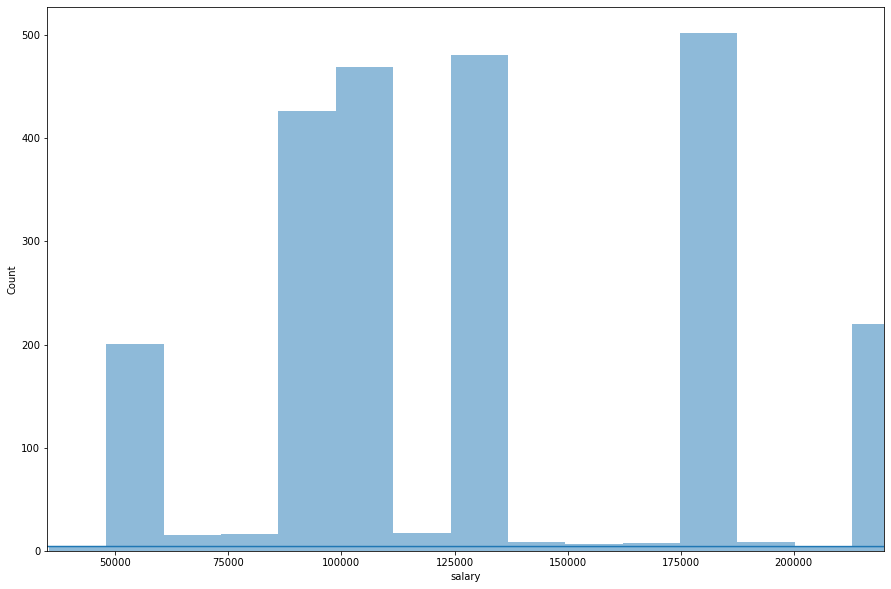

In [155]:
# Distplot to visualise the salary 

fig = plt.figure (figsize = (15,10))
ax = fig.gca()
ax = sns.histplot(seek_final.salary, kde = True)
ax.set(xlim = (35000, 220000))

# Modelling

Due to the nature of my salaries I will be binning them into buckets 1, 2, 3, 4, 5, 6. 
Will be going for a classification model instead in this case as I am aware that a regression doesn't seem to be yielding 
the best results. 

In [833]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

## Regression

In [ ]:
# Standardise the predictor matrix

In [585]:
from sklearn.preprocessing import StandardScaler
ss1 = StandardScaler()
ss2 = StandardScaler()

Xs_train = ss1.fit_transform(X_train_1)
Xs_test = ss1.transform(X_test_1)

In [ ]:
# Run GridSearch CV using Elastic Net Regression on Xs_train and y_train to identify best score and best parameters

In [578]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV

In [835]:
# Grid search parameters are an array of alpha from 10^-5 to 10^5 and an array on the l1_ratio from 0 to 1
EN_Reg = ElasticNet(max_iter=5000)
grid_search_params = {'alpha': np.logspace(-3, 3, 15),
                     'l1_ratio': np.linspace(0,1,11)}

In [836]:
EN_gridsearch = GridSearchCV(EN_Reg, grid_search_params, verbose=1, cv=5, n_jobs = -1)

In [837]:
EN_gridsearch.fit(Xs_train, y_train)

Fitting 5 folds for each of 550 candidates, totalling 2750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 14.5min


KeyboardInterrupt: 

In [626]:
# GIving up on gridearch for Elastic Net - Linear Regression 

print(X_train_1.shape)
print(X_test_1.shape)

print(y_train.shape)
print(y_test.shape)

(1928, 1508)
(482, 1508)
(1928,)
(482,)


In [ ]:
# Lasso Regression

In [582]:
LasReg = Lasso(alpha = 2000)

In [680]:
LasReg.fit(Xs_train, y_train)

C:\Users\vgoun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2448775052705460.0, tolerance: 39214338333285.055
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=2000)

In [681]:
LasReg.score(Xs_train, y_train)

0.8912059959515848

## Classification

In [ ]:
# going to user random forest regressor and extra tree since my y variable is continuous

In [668]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
# import sklearn.extratrees import extra trees # that will randomly split the feature space 

from sklearn.tree import export_graphviz

In [632]:
from sklearn.ensemble import RandomForestRegressor


regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(X_train_1, y_train)

# if we take away max depth - we get a super high r squared 



RandomForestRegressor(max_depth=5, random_state=0)

In [633]:
regr.score(X_test_1, y_test)

0.7260430180864679

In [635]:

regr.feature_importances_

# this number will tell us why the r squared is why it is the way it is. this is the regression coef - this is showing the
# most important feature 


array([2.08015358e-11, 0.00000000e+00, 0.00000000e+00, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [ ]:

# Can't load the random forest for some reasdon. 

dot_data = StringIO()

export_graphviz(regr, out_file = dot_data, filled = True, rounded = True, special_characters = True, )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png()) 

In [ ]:
# Using Extra Trees Regressor

In [656]:
from sklearn.ensemble import ExtraTreesRegressor

reg = ExtraTreesRegressor(n_estimators=100, random_state=0, criterion= 'mse', max_depth = 4).fit(X_train_1, y_train)



In [657]:
reg.score(X_test_1, y_test)

0.8619713450009526

In [644]:
# Tried max_depth with 4 and got 0.86 
# Tried max_depth with 2 and got 0.94
# 0 max_depth  and had a 0.51 r squared

In [671]:
ETR_train = reg.score(X_train_1,y_train)
ETR_test  = reg.score(X_test_1,y_test)

print(' Train scores :' ,ETR_train)
print(' Test scores :' ,ETR_test)

print('With a max_depth of 4')


 Train scores : 0.8417977048717673
 Test scores : 0.8619713450009526
With a max_depth of 4


In [660]:
# TEMPLATE CODE
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# initialize the output file object
dot_data = StringIO() 


In [685]:
y

0        50000.0
1        50000.0
2        57999.5
3        57999.5
4        50000.0
          ...   
2405    175000.0
2406    175000.0
2407    220000.0
2408    220000.0
2409    220000.0
Name: salary, Length: 2410, dtype: float64

In [686]:
# Turning Salary into a bucket / bin


def salary_range(x):
    if x <= 70000:
        return 'low salary'
    elif (x > 70000) and (x <120000):
        return 'medium salary'
    elif x >= 120000:
        return 'high salary'
    else:
        return 'no salary'


In [692]:
seek_final['salary range'] = seek_final['salary'].apply(salary_range)

In [699]:
seek_final['salary range'].value_counts()

high salary      1266
medium salary     925
low salary        219
Name: salary range, dtype: int64

In [695]:
seek_final

,title,date,company,location,salary,description,desc,salary_range,salary range
0,data analyst / administration manager,13 Feb 2021,FRHP Holdings Pty Ltd,Sydney,50000.0,pace farms is a second generation family busin...,pace farms is a second generation family busin...,low salary,low salary
1,business performance analyst - nswnjp00001784 ...,15 Feb 2021,Oceans Group,Sydney,50000.0,job title business performance analyst pay ra...,job title business performance analyst pay ra...,low salary,low salary
2,start your new career as a data analyst,15 Feb 2021,The Data School Pty Ltd,Sydney,57999.5,the demand for great and has never been high...,the demand for great and has never been high...,low salary,low salary
3,start your new career as a data analyst,15 Feb 2021,The Data School Pty Ltd,Melbourne,57999.5,the demand for great and has never been high...,the demand for great and has never been high...,low salary,low salary
4,data analyst,9 Feb 2021,IPA SE Melbourne,Melbourne,50000.0,the successful applicant will be working with...,the successful applicant will be working with...,low salary,low salary
...,...,...,...,...,...,...,...,...,...
2405,data visualisation developers/data developers ...,19 Jan 2021,HiTech Personnel,Brisbane,175000.0,one of australia’s most highly regarded federa...,one of australia’s most highly regarded federa...,high salary,high salary
2406,data visualisation developers/data developers ...,19 Jan 2021,HiTech Personnel,ACT,175000.0,one of australia’s most highly regarded federa...,one of australia’s most highly regarded federa...,high salary,high salary
2407,data visualisation developer,19 Jan 2021,Aurec,ACT,220000.0,we are after people with a broad range of skil...,we are after people with a broad range of skil...,high salary,high salary
2408,data visualisation developers/data developers ...,19 Jan 2021,HiTech Personnel,Brisbane,220000.0,one of australia’s most highly regarded federa...,one of australia’s most highly regarded federa...,high salary,high salary


In [ ]:
# Using Logistic Regression now as we have turned out salaries into high, medium and low

In [702]:
X_jobtitle = seek_final['title']
y_salary = seek_final['salary range']

In [703]:
logregmodel = make_pipeline(CountVectorizer(ngram_range = (1,2), binary = True), LogisticRegression())

logregmodel.fit(X_jobtitle, y_salary)

print(np.mean(cross_val_score(logregmodel, X_jobtitle, y_salary)))

0.5958506224066391


C:\Users\vgoun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [710]:
# Using a new package called Eli5 to show top features
eli5.explain_weights(logregmodel, top=40)

Explanation(estimator="Pipeline(steps=[('countvectorizer',\n                 CountVectorizer(binary=True, ngram_range=(1, 2))),\n                ('logisticregression', LogisticRegression())])", description="\nFeatures with largest coefficients per class.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target='high salary', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='test', weight=1.0412810094235796, std=None, value=None), FeatureWeight(feature='senior python', weight=1.0018299384639178, std=None, value=None), FeatureWeight(feature='business analysts', weight=0.978843679479165, std=None, value=None), FeatureWeight(feature='test analyst', weight=0.9529268966781076, std=None, value=None), FeatureWeight(feature='analyst health', weight=0.9354013221409614, std=None, value=None), FeatureWeight(feature='senior', weight=0.8397785613052157, std=None, value=None), FeatureWeight(feature='senior systems', weight=0.8320871839096357, std=None, value=None), FeatureWeight(feature='analyst ict', weight=0.8281423943963597, std=None, value=None), FeatureWeight(feature='functional', weight=0.8189718381283904, std=None, value=None), FeatureWeight(feature='data', weight=0.7927943335483507, std=None, value=None), FeatureWeight(feature='m24', weight=0.7811627337709655, std=None, value=None), FeatureWeight(feature='health', weight=0.7782945055686844, std=None, value=None), FeatureWeight(feature='risk reporting', weight=0.7764136862015459, std=None, value=None), FeatureWeight(feature='database developer', weight=0.7643095820888909, std=None, value=None), FeatureWeight(feature='analyst etl', weight=0.7483803699599039, std=None, value=None), FeatureWeight(feature='upgrade', weight=0.7334886084083841, std=None, value=None), FeatureWeight(feature='risk', weight=0.7327785804652801, std=None, value=None), FeatureWeight(feature='crime business', weight=0.731590455376844, std=None, value=None), FeatureWeight(feature='analyst darwin', weight=0.7279807366424613, std=None, value=None), FeatureWeight(feature='business', weight=0.7269202503476431, std=None, value=None), FeatureWeight(feature='senior financial', weight=0.7243928427603347, std=None, value=None), FeatureWeight(feature='system analyst', weight=0.7198217739719525, std=None, value=None), FeatureWeight(feature='intelligence reporting', weight=0.7167021492110903, std=None, value=None), FeatureWeight(feature='investment performance', weight=0.7162068641724082, std=None, value=None), FeatureWeight(feature='finance business', weight=0.6888974839367792, std=None, value=None), FeatureWeight(feature='banking', weight=0.6722184338561791, std=None, value=None), FeatureWeight(feature='insurance', weight=0.6661972840786706, std=None, value=None), FeatureWeight(feature='project analyst', weight=0.6659889004072883, std=None, value=None)], neg=[FeatureWeight(feature='junior', weight=-1.1409706679263836, std=None, value=None), FeatureWeight(feature='business systems', weight=-0.9713457351100702, std=None, value=None), FeatureWeight(feature='operational', weight=-0.926148209641691, std=None, value=None), FeatureWeight(feature='ict business', weight=-0.9007627030732144, std=None, value=None), FeatureWeight(feature='analysts darwin', weight=-0.8842876213177006, std=None, value=None), FeatureWeight(feature='analyst process', weight=-0.817785691297792, std=None, value=None), FeatureWeight(feature='digital product', weight=-0.8105758820563641, std=None, value=None), FeatureWeight(feature='intelligence analyst', weight=-0.781274

In [ ]:
# Trying Random Forest Classifier

In [712]:
rfc = make_pipeline(CountVectorizer(ngram_range=(1,2), binary=True), RandomForestClassifier())

rfc.fit(X_jobtitle, y_salary)

print(np.mean(cross_val_score(rfc, X_jobtitle, y_salary)))

0.5921161825726141


# Q2. 

Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

In [679]:
seek_final['title']

0                   data analyst / administration manager
1       business performance analyst - nswnjp00001784 ...
2                 start your new career as a data analyst
3                 start your new career as a data analyst
4                                            data analyst
                              ...                        
2405    data visualisation developers/data developers ...
2406    data visualisation developers/data developers ...
2407                         data visualisation developer
2408    data visualisation developers/data developers ...
2409    data visualisation developers/data developers ...
Name: title, Length: 2410, dtype: object

In [775]:
seek_final.drop('salary_range', axis = 1, inplace = True)

In [776]:
seek_final

,title,date,company,location,salary,description,desc,salary range
0,data analyst / administration manager,13 Feb 2021,FRHP Holdings Pty Ltd,Sydney,50000.0,pace farms is a second generation family busin...,pace farms is a second generation family busin...,low salary
1,business performance analyst - nswnjp00001784 ...,15 Feb 2021,Oceans Group,Sydney,50000.0,job title business performance analyst pay ra...,job title business performance analyst pay ra...,low salary
2,start your new career as a data analyst,15 Feb 2021,The Data School Pty Ltd,Sydney,57999.5,the demand for great and has never been high...,the demand for great and has never been high...,low salary
3,start your new career as a data analyst,15 Feb 2021,The Data School Pty Ltd,Melbourne,57999.5,the demand for great and has never been high...,the demand for great and has never been high...,low salary
4,data analyst,9 Feb 2021,IPA SE Melbourne,Melbourne,50000.0,the successful applicant will be working with...,the successful applicant will be working with...,low salary
...,...,...,...,...,...,...,...,...
2405,data visualisation developers/data developers ...,19 Jan 2021,HiTech Personnel,Brisbane,175000.0,one of australia’s most highly regarded federa...,one of australia’s most highly regarded federa...,high salary
2406,data visualisation developers/data developers ...,19 Jan 2021,HiTech Personnel,ACT,175000.0,one of australia’s most highly regarded federa...,one of australia’s most highly regarded federa...,high salary
2407,data visualisation developer,19 Jan 2021,Aurec,ACT,220000.0,we are after people with a broad range of skil...,we are after people with a broad range of skil...,high salary
2408,data visualisation developers/data developers ...,19 Jan 2021,HiTech Personnel,Brisbane,220000.0,one of australia’s most highly regarded federa...,one of australia’s most highly regarded federa...,high salary


In [778]:
seek_final.title.value_counts()

business analyst                                                        174
senior business analyst                                                  82
data analyst                                                             50
data engineer                                                            39
technical business analyst                                               38
                                                                       ... 
senior database engineer - sql dba                                        1
energy modelling analyst                                                  1
crm analyst                                                               1
qc analyst - immediate start                                              1
software platform operations/analyst - northern beaches tech company      1
Name: title, Length: 834, dtype: int64

In [782]:
# Lets create  a function to divide job title into Data Scientist and other jobs

def jobtitle(x):
    if 'scientist' in x.lower():
        return 'Data_Scientist'
#     elif 'analys' in x.lower():
#         return 'Analyst'
    else:
        return 'other_jobs'

In [783]:
# Lets create a new column for titles

seek_final['title_new'] = seek_final['title'].map(jobtitle)
seek_final['title_new'].value_counts()

other_jobs        2326
Data_Scientist      84
Name: title_new, dtype: int64

In [784]:
# Lets convert them into binary form

def binary(x):
    if x == 'Data_Scientist':
        return 1
    elif x == 'other_jobs':
        return 0
    else:
        return x

In [786]:
# Lets binarize the column

seek_final.title_new.map(lambda x : binary(x))


0       0
1       0
2       0
3       0
4       0
       ..
2405    0
2406    0
2407    0
2408    0
2409    0
Name: title_new, Length: 2410, dtype: int64

In [787]:
seek_final.title_new.value_counts()

other_jobs        2326
Data_Scientist      84
Name: title_new, dtype: int64

In [789]:

# Setting up the target and predictors

X = seek_final.desc
y = seek_final.title_new

In [790]:
# Train Test split for Logistic Regression Model

X_train_logReg, X_test_logReg, y_train_logReg, y_test_logReg = train_test_split(X,y,random_state = 42,test_size=.30)

X_train_logReg.shape , X_test_logReg.shape, y_train_logReg.shape, y_test_logReg.shape

((1687,), (723,), (1687,), (723,))

In [791]:
# Checking the cross val scores

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


model_logReg = make_pipeline(CountVectorizer(ngram_range=(2,2),binary =True, min_df=5, 
                                      stop_words='english',lowercase=False),LogisticRegression())

cross_validation = cross_val_score(model_logReg,X,y,cv=5)

print('cross_validation_score :',cross_validation)
print('cross_validation_mean :',cross_validation.mean())
print('cross_validation_std :',cross_validation.std())

cross_validation_score : [0.98962656 0.98340249 1.         1.         0.99792531]
cross_validation_mean : 0.9941908713692946
cross_validation_std : 0.006613019689007991


In [792]:

# Fitting the model and checking on scores

model_logReg.fit(X_train_logReg,y_train_logReg)


scores_train_logReg = model_logReg.score(X_train_logReg,y_train_logReg)
scores_test_logReg = model_logReg.score(X_test_logReg,y_test_logReg)

print(' Train score :' ,scores_train_logReg)
print(' Test score :' ,scores_test_logReg)

yhat_logReg = model_logReg.predict(X_test_logReg)

 Train score : 0.998221695317131
 Test score : 0.9875518672199171


In [793]:
# Lets check the baseline score

baseline = y.value_counts(normalize=True)
baseline

other_jobs        0.965145
Data_Scientist    0.034855
Name: title_new, dtype: float64

In [794]:
# Lets see the classification report for Logistic Regression Model

from sklearn import metrics

print(metrics.confusion_matrix(y_test_logReg, yhat_logReg))
print('-'*55, '\n')
print(metrics.classification_report(y_test_logReg, yhat_logReg))

[[ 11   9]
 [  0 703]]
------------------------------------------------------- 

                precision    recall  f1-score   support

Data_Scientist       1.00      0.55      0.71        20
    other_jobs       0.99      1.00      0.99       703

      accuracy                           0.99       723
     macro avg       0.99      0.78      0.85       723
  weighted avg       0.99      0.99      0.99       723



In [795]:
# Lets visualize the top 15 features

eli5.explain_weights(model_logReg,top=15,)

Explanation(estimator="Pipeline(steps=[('countvectorizer',\n                 CountVectorizer(binary=True, lowercase=False, min_df=5,\n                                 ngram_range=(2, 2), stop_words='english')),\n                ('logisticregression', LogisticRegression())])", description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target='other_jobs', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=5.081170686063694, std=None, value=None), FeatureWeight(feature='business analyst', weight=0.7765790864551491, std=None, value=None)], neg=[FeatureWeight(feature='data scientist', weight=-2.1110905911451883, std=None, value=None), FeatureWeight(feature='scientist join', weight=-1.1011484928104511, std=None, value=None), FeatureWeight(feature='product development', weight=-1.0227650055307456, std=None, value=None), FeatureWeight(feature='machine learning', weight=-1.0097086516078668, std=None, value=None), FeatureWeight(feature='data science', weight=-0.9844385846949553, std=None, value=None), FeatureWeight(feature='experienced data', weight=-0.904395394234163, std=None, value=None), FeatureWeight(feature='work independently', weight=-0.8558464166685099, std=None, value=None), FeatureWeight(feature='business unit', weight=-0.7923161548278772, std=None, value=None), FeatureWeight(feature='whilst ensuring', weight=-0.7906910667840078, std=None, value=None), FeatureWeight(feature='quality assurance', weight=-0.7522503845861237, std=None, value=None), FeatureWeight(feature='services business', weight=-0.7144405809643338, std=None, value=None), FeatureWeight(feature='client leader', weight=-0.6764424431542545, std=None, value=None), FeatureWeight(feature='successful candidate', weight=-0.6387571830790927, std=None, value=None)], pos_remaining=4180, neg_remaining=786), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [796]:
# Train Test split for Random Forest model

X_train_rfc,X_test_rfc,y_train_rfc,y_test_rfc = train_test_split(X,y,test_size=.30)

X_train_rfc.shape , X_test_rfc.shape,y_train_rfc.shape,y_test_rfc.shape

((1687,), (723,), (1687,), (723,))

In [797]:
# Cross Validation with RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

model_rfc = make_pipeline(CountVectorizer(ngram_range=(2,2),binary =True, min_df=5, 
                                      stop_words='english',
                                          lowercase=False),
                          RandomForestClassifier(n_estimators=100,max_depth=None,max_features='auto'))

Validation = cross_val_score(model_rfc,X,y,cv=5)

print('cross_validation_score :',cross_validation)
print('cross_validation_mean :',cross_validation.mean())
print('cross_validation_std :',cross_validation.std())


cross_validation_score : [0.98962656 0.98340249 1.         1.         0.99792531]
cross_validation_mean : 0.9941908713692946
cross_validation_std : 0.006613019689007991


In [798]:
# Lets fit the model

model_rfc.fit(X_train_rfc,y_train_rfc)

scores_train_rfc = model_rfc.score(X_train_rfc,y_train_rfc)
scores_test_rfc = model_rfc.score(X_test_rfc,y_test_rfc)

print(' Train score :' ,scores_train_rfc)
print(' Test score :' ,scores_test_rfc)

yhat_rfc = model_rfc.predict(X_test_rfc)

 Train score : 1.0
 Test score : 0.9930843706777317


In [799]:

# Lets see the classification report forRandomForestClassifer Model

from sklearn import metrics

print(metrics.confusion_matrix(y_test_rfc, yhat_rfc))
print('-'*55, '\n')
print(metrics.classification_report(y_test_rfc, yhat_rfc))

[[ 15   5]
 [  0 703]]
------------------------------------------------------- 

                precision    recall  f1-score   support

Data_Scientist       1.00      0.75      0.86        20
    other_jobs       0.99      1.00      1.00       703

      accuracy                           0.99       723
     macro avg       1.00      0.88      0.93       723
  weighted avg       0.99      0.99      0.99       723



In [800]:
# Top 15 feature with RandomForestClassifier

eli5.explain_weights(model_rfc,top=15)

Weight,Feature
0.0282 ± 0.1284,data scientist
0.0253 ± 0.1187,machine learning
0.0193 ± 0.0801,data science
0.0170 ± 0.0824,learning models
0.0079 ± 0.0318,computer vision
0.0077 ± 0.0459,real world
0.0075 ± 0.0356,experienced data
0.0063 ± 0.0482,scientist work
0.0060 ± 0.0395,boxes tables
0.0056 ± 0.0427,onqrecruitmentcomau review


In [823]:
seek_final['title']

0                   data analyst / administration manager
1       business performance analyst - nswnjp00001784 ...
2                 start your new career as a data analyst
3                 start your new career as a data analyst
4                                            data analyst
                              ...                        
2405    data visualisation developers/data developers ...
2406    data visualisation developers/data developers ...
2407                         data visualisation developer
2408    data visualisation developers/data developers ...
2409    data visualisation developers/data developers ...
Name: title, Length: 2410, dtype: object

In [ ]:
Trying out showing a word cloud

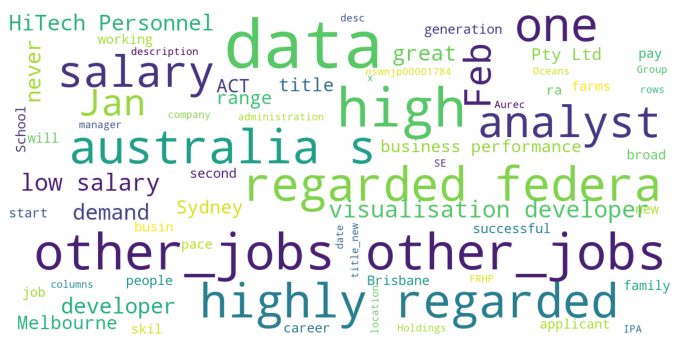

In [832]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(seek_final)